Guillermo José Cervera Cervera

**Desarrollo de modelos de minería de datos para evaluar el crecimiento de una empresa informática.**

# **Importar las librerías.**

Importamos las librerías necesarias.

In [ ]:
# import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# import libraries for classification and evaluation
import seaborn as sn
from six import StringIO
from sklearn import metrics, tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier, plot_tree

# **Dataset de projectos.**

Cargamos los datos de Projects.xlsx en un DataFrame.

In [ ]:
# load Projects data into a DataFrame
url = 'https://raw.github.com/GuillermoCervera/TFM-Big-Data-y-Ciencia-de-Datos/main/Projects.xlsx'
df_projects = pd.read_excel(url)
df_projects

,Issue Key,Issue summary,Work date,Hours,Username,Period,Account Key,Account Name,Account Lead,Account Category,...,Work Description,Parent Key,Reporter,External Hours,Billed Hours,Issue Original Estimate,Issue Remaining Estimate,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,JUSTIT-1899,The Schriftgut properties should always be abl...,2019-11-06 00:00:00,4.25,ignacio,NaN,NaN,NaN,NaN,NaN,...,Work with mirror behaviour from server,NaN,stefan,0,4.25,NaN,0.0,NaN,NaN,NaN
1,JUSTIT-1899,The Schriftgut properties should always be abl...,2019-11-05 00:00:00,4.50,ignacio,NaN,NaN,NaN,NaN,NaN,...,Fixing,NaN,stefan,0,4.50,NaN,0.0,NaN,NaN,NaN
2,JUSTIT-2008,Transaction (Process ID 118) was deadlocked...,2019-11-06 00:00:00,4.00,gregorio,NaN,NaN,NaN,NaN,NaN,...,JUSTIT-2008,NaN,stefan,0,4.00,NaN,0.0,NaN,NaN,NaN
3,JUSTIT-2001,"""Aufbewahrungsfrist"" fills wrong ""Datum bis"" (...",2019-11-06 00:00:00,7.00,sergio,NaN,NaN,NaN,NaN,NaN,...,Analysis and dev,NaN,neva,0,7.00,NaN,0.0,NaN,NaN,NaN
4,JUSTIT-1974,Schriftgut properties should always be able to...,2019-11-06 00:00:00,1.00,roberto,NaN,NaN,NaN,NaN,NaN,...,the nulls values are not ignored in the mappin...,NaN,juanb,0,1.00,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12814,TROVA-2513,"Change Adressformat output for Country ""Taiwan""",2022-01-21 15:38:00,0.50,stella,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Project,0.00,0.50,NaN,0,https://jiraext.xplain.ch/browse/TROVA-626,NaN
12815,TROVA-2497,"Bug in Geschäfts search ""Pro Person 1 Treffer""",2022-01-21 00:00:00,1.00,marcial,NaN,NaN,NaN,NaN,NaN,...,NaN,"Management, supporting Álvaro.",NaN,Project,0.00,1.00,0.0,0,https://jiraext.xplain.ch/browse/TROVA-608,NaN
12816,TROVA-2507,Inactive Users are not shown in Grids,2022-01-21 00:00:00,4.75,juanb,NaN,NaN,NaN,NaN,NaN,...,NaN,Working on issue.,NaN,Project,0.00,4.75,0.0,0,https://jiraext.xplain.ch/browse/TROVA-456,NaN
12817,TROVA-2498,Person data are not shown in Geschäft search o...,2022-01-21 00:00:00,3.00,marcial,NaN,NaN,NaN,NaN,NaN,...,NaN,Development and testing.,NaN,Project,0.00,3.00,0.0,0,https://jiraext.xplain.ch/browse/TROVA-567,NaN


Verificamos la forma del dataset de projectos.

In [ ]:
# display shape (the number of rows and columns) of the Projects dataset
print(df_projects.shape)

(12819, 30)


Tenemos 12819 instancias y 30 variables de entrada en el dataset de proyectos.

Verificamos los tipos de datos que hay en el dataset de projectos.

In [ ]:
# display data types of the columns of the Projects dataset
print(df_projects.dtypes)

Issue Key                           object
Issue summary                       object
Work date                   datetime64[ns]
Hours                              float64
Username                            object
Period                             float64
Account Key                        float64
Account Name                       float64
Account Lead                       float64
Account Category                   float64
Account Customer                   float64
Activity Name                       object
Component                           object
All Components                      object
Version Name                        object
Issue Type                          object
Issue Status                        object
Project Key                         object
Epic                                object
Epic Link                          float64
Work Description                    object
Parent Key                          object
Reporter                            object
External Ho

Tenemos variables de entrada de tipo cadena de caracteres, de fecha y hora y flotantes.

Mostramos algo más de información del dataset de proyectos.

In [ ]:
# display some more information about our Projects dataset
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12819 entries, 0 to 12818
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Issue Key                 12819 non-null  object        
 1   Issue summary             12819 non-null  object        
 2   Work date                 12819 non-null  datetime64[ns]
 3   Hours                     12819 non-null  float64       
 4   Username                  12819 non-null  object        
 5   Period                    0 non-null      float64       
 6   Account Key               0 non-null      float64       
 7   Account Name              0 non-null      float64       
 8   Account Lead              0 non-null      float64       
 9   Account Category          0 non-null      float64       
 10  Account Customer          0 non-null      float64       
 11  Activity Name             12819 non-null  object        
 12  Component         

Vemos que algunas características como Account Key, Account Name, Account Lead, Account Category, Account Customer y Epic Link tienen todos sus valores nulos.

Comprobamos de todas las variables de entrada, cuáles son númericas.

In [ ]:
# see numeric features
df_projects_numeric = df_projects.select_dtypes(include=[np.number])
numeric_cols = df_projects_numeric.columns.values
print(numeric_cols)

['Hours' 'Period' 'Account Key' 'Account Name' 'Account Lead'
 'Account Category' 'Account Customer' 'Epic Link' 'Billed Hours'
 'Issue Original Estimate' 'Issue Remaining Estimate']


Tenemos estas 11 variables de entrada de tipo numérico.

Ahora comprobamos cuáles no son númericas.

In [ ]:
# see non numeric features
df_projects_non_numeric = df_projects.select_dtypes(exclude=[np.number])
non_numeric_cols = df_projects_non_numeric.columns.values
print(non_numeric_cols)

['Issue Key' 'Issue summary' 'Work date' 'Username' 'Activity Name'
 'Component' 'All Components' 'Version Name' 'Issue Type' 'Issue Status'
 'Project Key' 'Epic' 'Work Description' 'Parent Key' 'Reporter'
 'External Hours' 'Unnamed: 27' 'Unnamed: 28' 'Unnamed: 29']


Tenemos estas 19 de tipo no numérico. En este caso, de tipo datetime y, sobretodo, de tipo cadena de caracteres.

**Mapa de calor de los valores faltantes.**

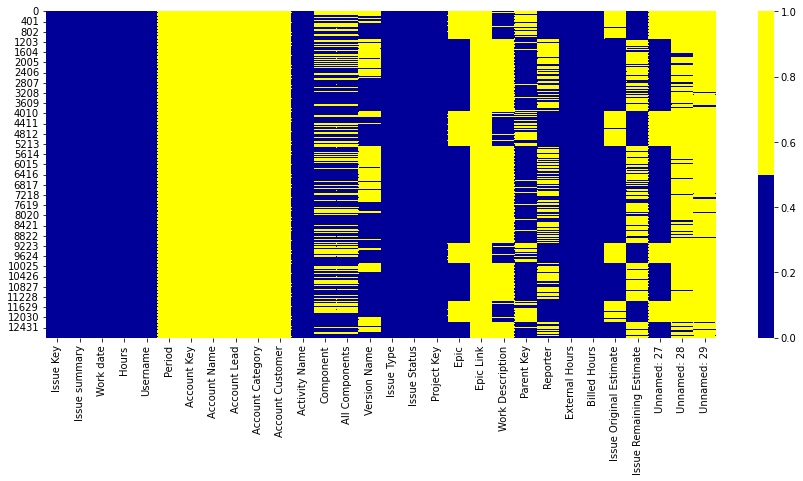

In [ ]:
# Missing Data Heatmap
cols = df_projects.columns[:] # all columns
colours = ['#000099', '#ffff00'] # specify colour. Yellow is a missing value. Blue is not missing
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(df_projects[cols].isnull(), cmap=sns.color_palette(colours))

El gráfico anterior muestra los patrones de datos que faltan de las características. En el eje horizontal, se muestra el nombre del atributo de entrada; y en el eje vertical, se muestra el número de observaciones. El color amarillo representa los datos que faltan, mientras que el color azul, el caso contrario. Por ejemplo, vemos que la característica Period tiene valores perdidos en todas las filas. Mientras que la variable Issue Key no tiene pequeños valores perdidos.

**Lista de porcentaje de datos faltantes.**

In [ ]:
# Missing Data Percentage List
for col in df_projects.columns:
    pct_missing = np.mean(df_projects[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Issue Key - 0%
Issue summary - 0%
Work date - 0%
Hours - 0%
Username - 0%
Period - 100%
Account Key - 100%
Account Name - 100%
Account Lead - 100%
Account Category - 100%
Account Customer - 100%
Activity Name - 0%
Component - 35%
All Components - 35%
Version Name - 41%
Issue Type - 0%
Issue Status - 0%
Project Key - 0%
Epic - 31%
Epic Link - 100%
Work Description - 72%
Parent Key - 27%
Reporter - 42%
External Hours - 0%
Billed Hours - 0%
Issue Original Estimate - 30%
Issue Remaining Estimate - 53%
Unnamed: 27 - 31%
Unnamed: 28 - 90%
Unnamed: 29 - 97%


La lista anterior muestra el porcentaje de valores faltantes para cada una de las características. Se puede ver que a la característica Unnamed: 29 le falta el 97% de los datos, mientras que a Hours no le falta ningun dato (0%).

**Histograma de datos faltantes.**

Created missing indicator for: Period
Created missing indicator for: Account Key
Created missing indicator for: Account Name
Created missing indicator for: Account Lead
Created missing indicator for: Account Category
Created missing indicator for: Account Customer
Created missing indicator for: Component
Created missing indicator for: All Components
Created missing indicator for: Version Name
Created missing indicator for: Epic
Created missing indicator for: Epic Link
Created missing indicator for: Work Description
Created missing indicator for: Parent Key
Created missing indicator for: Reporter
Created missing indicator for: Issue Original Estimate
Created missing indicator for: Issue Remaining Estimate
Created missing indicator for: Unnamed: 27
Created missing indicator for: Unnamed: 28
Created missing indicator for: Unnamed: 29


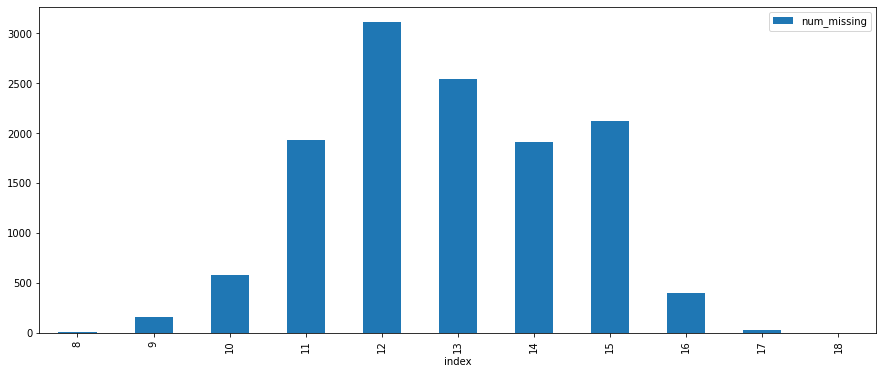

In [ ]:
# Missing Data Histogram

# first create missing indicator for features with missing data
for col in df_projects.columns:
    missing = df_projects[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Created missing indicator for: {}'.format(col))
        df_projects['{}_ismissing'.format(col)] = missing

# then, based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_projects.columns if 'ismissing' in col]
df_projects['num_missing'] = df_projects[ismissing_cols].sum(axis=1)

df_projects['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing', figsize=(15,6))

El histograma anterior muestra que hay más de 3000 instancias con 12 valores perdidos y más de 2500 instancias con 13 valores perdidos.

Desechamos las variables de entrada que no son necesarias para lograr el objetivo.

In [ ]:
# remove unnecessary features
df_projects = df_projects[df_projects.columns.drop(list(df_projects.filter(regex='missing')))]
df_projects_working_with_columns = df_projects.drop(['Work date',
'Period', 'Account Key', 'Account Name', 'Account Lead', 'Account Category', 
'Account Customer', 'Epic Link', 'Billed Hours', 'Issue Original Estimate', 
'Issue Remaining Estimate', 'Issue Key', 'Issue summary', 'Username', 
'Activity Name', 'Component', 'All Components', 'Version Name', 'Issue Type', 
'Issue Status', 'Project Key', 'Epic', 'Work Description', 'Parent Key', 
'Reporter', 'External Hours', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], 
axis=1)
df_projects_working_with_columns

,Hours
0,4.25
1,4.50
2,4.00
3,7.00
4,1.00
...,...
12814,0.50
12815,1.00
12816,4.75
12817,3.00


Se suman las horas de cada sprint de los proyectos.

In [ ]:
# sum of hours per sprint

# project 1
sum_hours_sprint1_project1 = df_projects_working_with_columns.iloc[0:251, :].sum(axis=0)
sum_hours_sprint2_project1 = df_projects_working_with_columns.iloc[251:397, :].sum(axis=0)
sum_hours_sprint3_project1 = df_projects_working_with_columns.iloc[397:436, :].sum(axis=0)
sum_hours_sprint4_project1 = df_projects_working_with_columns.iloc[436:540, :].sum(axis=0)
sum_hours_sprint5_project1 = df_projects_working_with_columns.iloc[540:642, :].sum(axis=0)
sum_hours_sprint6_project1 = df_projects_working_with_columns.iloc[642:770, :].sum(axis=0)
sum_hours_sprint7_project1 = df_projects_working_with_columns.iloc[770:1100, :].sum(axis=0)
sum_hours_sprint8_project1 = df_projects_working_with_columns.iloc[1100:1255, :].sum(axis=0)
sum_hours_sprint9_project1 = df_projects_working_with_columns.iloc[1255:1329, :].sum(axis=0)
sum_hours_sprint10_project1 = df_projects_working_with_columns.iloc[1329:1416, :].sum(axis=0)
sum_hours_sprint11_project1 = df_projects_working_with_columns.iloc[1416:1646, :].sum(axis=0)
sum_hours_sprint12_project1 = df_projects_working_with_columns.iloc[1646:1880, :].sum(axis=0)
sum_hours_sprint13_project1 = df_projects_working_with_columns.iloc[1880:2254, :].sum(axis=0)
sum_hours_sprint14_project1 = df_projects_working_with_columns.iloc[2254:2355, :].sum(axis=0)
sum_hours_sprint15_project1 = df_projects_working_with_columns.iloc[2355:2416, :].sum(axis=0)
sum_hours_sprint16_project1 = df_projects_working_with_columns.iloc[2416:2553, :].sum(axis=0)
sum_hours_sprint17_project1 = df_projects_working_with_columns.iloc[2553:2643, :].sum(axis=0)
sum_hours_sprint18_project1 = df_projects_working_with_columns.iloc[2643:2685, :].sum(axis=0)
sum_hours_sprint19_project1 = df_projects_working_with_columns.iloc[2685:2694, :].sum(axis=0)
sum_hours_sprint20_project1 = df_projects_working_with_columns.iloc[2694:2724, :].sum(axis=0)
sum_hours_sprint21_project1 = df_projects_working_with_columns.iloc[2724:2880, :].sum(axis=0)
sum_hours_sprint22_project1 = df_projects_working_with_columns.iloc[2880:3078, :].sum(axis=0)
sum_hours_sprint23_project1 = df_projects_working_with_columns.iloc[3078:3166, :].sum(axis=0)
sum_hours_sprint24_project1 = df_projects_working_with_columns.iloc[3166:3366, :].sum(axis=0)
sum_hours_sprint25_project1 = df_projects_working_with_columns.iloc[3366:3570, :].sum(axis=0)
sum_hours_sprint26_project1 = df_projects_working_with_columns.iloc[3570:3715, :].sum(axis=0)
sum_hours_sprint27_project1 = df_projects_working_with_columns.iloc[3715:3799, :].sum(axis=0)
sum_hours_sprint28_project1 = df_projects_working_with_columns.iloc[3799:3932, :].sum(axis=0)

# project 2
sum_hours_sprint1_project2 = df_projects_working_with_columns.iloc[3932:4066, :].sum(axis=0)
sum_hours_sprint2_project2 = df_projects_working_with_columns.iloc[4066:4185, :].sum(axis=0)
sum_hours_sprint3_project2 = df_projects_working_with_columns.iloc[4185:4245, :].sum(axis=0)
sum_hours_sprint4_project2 = df_projects_working_with_columns.iloc[4245:4540, :].sum(axis=0)
sum_hours_sprint5_project2 = df_projects_working_with_columns.iloc[4540:4766, :].sum(axis=0)
sum_hours_sprint6_project2 = df_projects_working_with_columns.iloc[4766:5169, :].sum(axis=0)
sum_hours_sprint7_project2 = df_projects_working_with_columns.iloc[5169:5291, :].sum(axis=0)
sum_hours_sprint8_project2 = df_projects_working_with_columns.iloc[5291:5595, :].sum(axis=0)
sum_hours_sprint9_project2 = df_projects_working_with_columns.iloc[5595:5666, :].sum(axis=0)
sum_hours_sprint10_project2 = df_projects_working_with_columns.iloc[5666:5755, :].sum(axis=0)
sum_hours_sprint11_project2 = df_projects_working_with_columns.iloc[5755:6001, :].sum(axis=0)
sum_hours_sprint12_project2 = df_projects_working_with_columns.iloc[6001:6103, :].sum(axis=0)
sum_hours_sprint13_project2 = df_projects_working_with_columns.iloc[6103:6299, :].sum(axis=0)
sum_hours_sprint14_project2 = df_projects_working_with_columns.iloc[6299:6677, :].sum(axis=0)
sum_hours_sprint15_project2 = df_projects_working_with_columns.iloc[6677:6934, :].sum(axis=0)
sum_hours_sprint16_project2 = df_projects_working_with_columns.iloc[6934:7145, :].sum(axis=0)
sum_hours_sprint17_project2 = df_projects_working_with_columns.iloc[7145:7284, :].sum(axis=0)
sum_hours_sprint18_project2 = df_projects_working_with_columns.iloc[7284:7503, :].sum(axis=0)
sum_hours_sprint19_project2 = df_projects_working_with_columns.iloc[7503:7940, :].sum(axis=0)
sum_hours_sprint20_project2 = df_projects_working_with_columns.iloc[7940:8028, :].sum(axis=0)
sum_hours_sprint21_project2 = df_projects_working_with_columns.iloc[8028:8145, :].sum(axis=0)
sum_hours_sprint22_project2 = df_projects_working_with_columns.iloc[8028:8145, :].sum(axis=0)
sum_hours_sprint23_project2 = df_projects_working_with_columns.iloc[8145:8287, :].sum(axis=0)
sum_hours_sprint24_project2 = df_projects_working_with_columns.iloc[8287:8355, :].sum(axis=0)
sum_hours_sprint25_project2 = df_projects_working_with_columns.iloc[8478:8526, :].sum(axis=0)
sum_hours_sprint26_project2 = df_projects_working_with_columns.iloc[8526:8696, :].sum(axis=0)
sum_hours_sprint27_project2 = df_projects_working_with_columns.iloc[8696:8964, :].sum(axis=0)
sum_hours_sprint28_project2 = df_projects_working_with_columns.iloc[8964:9136, :].sum(axis=0)

# project 3
sum_hours_sprint1_project3 = df_projects_working_with_columns.iloc[9136:9381, :].sum(axis=0)
sum_hours_sprint2_project3 = df_projects_working_with_columns.iloc[9381:9515 :].sum(axis=0)
sum_hours_sprint3_project3 = df_projects_working_with_columns.iloc[9515:9559, :].sum(axis=0)
sum_hours_sprint4_project3 = df_projects_working_with_columns.iloc[9559:9680, :].sum(axis=0)
sum_hours_sprint5_project3 = df_projects_working_with_columns.iloc[9680:9771, :].sum(axis=0)
sum_hours_sprint6_project3 = df_projects_working_with_columns.iloc[9771:9834, :].sum(axis=0)
sum_hours_sprint7_project3 = df_projects_working_with_columns.iloc[9834:9898, :].sum(axis=0)
sum_hours_sprint8_project3 = df_projects_working_with_columns.iloc[9898:9981, :].sum(axis=0)
sum_hours_sprint9_project3 = df_projects_working_with_columns.iloc[9981:10032, :].sum(axis=0)
sum_hours_sprint10_project3 = df_projects_working_with_columns.iloc[10032:10090, :].sum(axis=0)
sum_hours_sprint11_project3 = df_projects_working_with_columns.iloc[10090:10149, :].sum(axis=0)
sum_hours_sprint12_project3 = df_projects_working_with_columns.iloc[10149:10226, :].sum(axis=0)
sum_hours_sprint13_project3 = df_projects_working_with_columns.iloc[10226:10288, :].sum(axis=0)
sum_hours_sprint14_project3 = df_projects_working_with_columns.iloc[10288:10368, :].sum(axis=0)
sum_hours_sprint15_project3 = df_projects_working_with_columns.iloc[10368:10420, :].sum(axis=0)
sum_hours_sprint16_project3 = df_projects_working_with_columns.iloc[10420:10587, :].sum(axis=0)
sum_hours_sprint17_project3 = df_projects_working_with_columns.iloc[10587:10738, :].sum(axis=0)
sum_hours_sprint18_project3 = df_projects_working_with_columns.iloc[10738:10794, :].sum(axis=0)
sum_hours_sprint19_project3 = df_projects_working_with_columns.iloc[10794:10865, :].sum(axis=0)
sum_hours_sprint20_project3 = df_projects_working_with_columns.iloc[10865:10929, :].sum(axis=0)
sum_hours_sprint21_project3 = df_projects_working_with_columns.iloc[10929:10957, :].sum(axis=0)
sum_hours_sprint22_project3 = df_projects_working_with_columns.iloc[10957:10995, :].sum(axis=0)
sum_hours_sprint23_project3 = df_projects_working_with_columns.iloc[10995:11067, :].sum(axis=0)
sum_hours_sprint24_project3 = df_projects_working_with_columns.iloc[11067:11145, :].sum(axis=0)
sum_hours_sprint25_project3 = df_projects_working_with_columns.iloc[11145:11231, :].sum(axis=0)
sum_hours_sprint26_project3 = df_projects_working_with_columns.iloc[11231:11266, :].sum(axis=0)
sum_hours_sprint27_project3 = df_projects_working_with_columns.iloc[11266:11288, :].sum(axis=0)
sum_hours_sprint28_project3 = df_projects_working_with_columns.iloc[11288:11412, :].sum(axis=0)

# project 4
sum_hours_sprint1_project4 = df_projects_working_with_columns.iloc[11412:11435, :].sum(axis=0)
sum_hours_sprint2_project4 = df_projects_working_with_columns.iloc[11435:11551, :].sum(axis=0)
sum_hours_sprint3_project4 = df_projects_working_with_columns.iloc[11551:11713, :].sum(axis=0)
sum_hours_sprint4_project4 = df_projects_working_with_columns.iloc[11713:11802, :].sum(axis=0)
sum_hours_sprint5_project4 = df_projects_working_with_columns.iloc[11802:11904, :].sum(axis=0)
sum_hours_sprint6_project4 = df_projects_working_with_columns.iloc[11904:11978, :].sum(axis=0)
sum_hours_sprint7_project4 = df_projects_working_with_columns.iloc[11978:12020, :].sum(axis=0)
sum_hours_sprint8_project4 = df_projects_working_with_columns.iloc[12020:12032, :].sum(axis=0)
sum_hours_sprint9_project4 = df_projects_working_with_columns.iloc[12032:12041, :].sum(axis=0)
sum_hours_sprint10_project4 = df_projects_working_with_columns.iloc[12041:12052, :].sum(axis=0)
sum_hours_sprint11_project4 = df_projects_working_with_columns.iloc[12052:12060, :].sum(axis=0)
sum_hours_sprint12_project4 = df_projects_working_with_columns.iloc[12060:12119, :].sum(axis=0)
sum_hours_sprint13_project4 = df_projects_working_with_columns.iloc[12119:12138, :].sum(axis=0)
sum_hours_sprint14_project4 = df_projects_working_with_columns.iloc[12138:12210, :].sum(axis=0)
sum_hours_sprint15_project4 = df_projects_working_with_columns.iloc[12210:12218, :].sum(axis=0)
sum_hours_sprint16_project4 = df_projects_working_with_columns.iloc[12218:12237, :].sum(axis=0)
sum_hours_sprint17_project4 = df_projects_working_with_columns.iloc[12237:12310, :].sum(axis=0)
sum_hours_sprint18_project4 = df_projects_working_with_columns.iloc[12310:12396, :].sum(axis=0)
sum_hours_sprint19_project4 = df_projects_working_with_columns.iloc[12396:12462, :].sum(axis=0)
sum_hours_sprint20_project4 = df_projects_working_with_columns.iloc[12462:12497, :].sum(axis=0)
sum_hours_sprint21_project4 = df_projects_working_with_columns.iloc[12497:12532, :].sum(axis=0)
sum_hours_sprint22_project4 = df_projects_working_with_columns.iloc[12532:12544, :].sum(axis=0)
sum_hours_sprint23_project4 = df_projects_working_with_columns.iloc[12544:12579, :].sum(axis=0)
sum_hours_sprint24_project4 = df_projects_working_with_columns.iloc[12579:12597, :].sum(axis=0)
sum_hours_sprint25_project4 = df_projects_working_with_columns.iloc[12597:12614, :].sum(axis=0)
sum_hours_sprint26_project4 = df_projects_working_with_columns.iloc[12614:12634, :].sum(axis=0)
sum_hours_sprint27_project4 = df_projects_working_with_columns.iloc[12634:12685, :].sum(axis=0)
sum_hours_sprint28_project4 = df_projects_working_with_columns.iloc[12685:12819, :].sum(axis=0)

Se añaden las horas sumadas a la nueva característica TotalHoursProject.

In [ ]:
# add TotalHoursProject values

# project 1
df_projects_working_with_columns['TotalHoursProject'] = 0.0
df_projects_working_with_columns.at[0, 'TotalHoursProject'] = sum_hours_sprint1_project1
df_projects_working_with_columns.at[1, 'TotalHoursProject'] = sum_hours_sprint2_project1
df_projects_working_with_columns.at[2, 'TotalHoursProject'] = sum_hours_sprint3_project1
df_projects_working_with_columns.at[3, 'TotalHoursProject'] = sum_hours_sprint4_project1
df_projects_working_with_columns.at[4, 'TotalHoursProject'] = sum_hours_sprint5_project1
df_projects_working_with_columns.at[5, 'TotalHoursProject'] = sum_hours_sprint6_project1
df_projects_working_with_columns.at[6, 'TotalHoursProject'] = sum_hours_sprint7_project1
df_projects_working_with_columns.at[7, 'TotalHoursProject'] = sum_hours_sprint8_project1
df_projects_working_with_columns.at[8, 'TotalHoursProject'] = sum_hours_sprint9_project1
df_projects_working_with_columns.at[9, 'TotalHoursProject'] = sum_hours_sprint10_project1
df_projects_working_with_columns.at[10, 'TotalHoursProject'] = sum_hours_sprint11_project1
df_projects_working_with_columns.at[11, 'TotalHoursProject'] = sum_hours_sprint12_project1
df_projects_working_with_columns.at[12, 'TotalHoursProject'] = sum_hours_sprint13_project1
df_projects_working_with_columns.at[13, 'TotalHoursProject'] = sum_hours_sprint14_project1
df_projects_working_with_columns.at[14, 'TotalHoursProject'] = sum_hours_sprint15_project1
df_projects_working_with_columns.at[15, 'TotalHoursProject'] = sum_hours_sprint16_project1
df_projects_working_with_columns.at[16, 'TotalHoursProject'] = sum_hours_sprint17_project1
df_projects_working_with_columns.at[17, 'TotalHoursProject'] = sum_hours_sprint18_project1
df_projects_working_with_columns.at[18, 'TotalHoursProject'] = sum_hours_sprint19_project1
df_projects_working_with_columns.at[19, 'TotalHoursProject'] = sum_hours_sprint20_project1
df_projects_working_with_columns.at[20, 'TotalHoursProject'] = sum_hours_sprint21_project1
df_projects_working_with_columns.at[21, 'TotalHoursProject'] = sum_hours_sprint22_project1
df_projects_working_with_columns.at[22, 'TotalHoursProject'] = sum_hours_sprint23_project1
df_projects_working_with_columns.at[23, 'TotalHoursProject'] = sum_hours_sprint24_project1
df_projects_working_with_columns.at[24, 'TotalHoursProject'] = sum_hours_sprint25_project1
df_projects_working_with_columns.at[25, 'TotalHoursProject'] = sum_hours_sprint26_project1
df_projects_working_with_columns.at[26, 'TotalHoursProject'] = sum_hours_sprint27_project1
df_projects_working_with_columns.at[27, 'TotalHoursProject'] = sum_hours_sprint28_project1

# project 2
df_projects_working_with_columns.at[28, 'TotalHoursProject'] = sum_hours_sprint1_project2
df_projects_working_with_columns.at[29, 'TotalHoursProject'] = sum_hours_sprint2_project2
df_projects_working_with_columns.at[30, 'TotalHoursProject'] = sum_hours_sprint3_project2
df_projects_working_with_columns.at[31, 'TotalHoursProject'] = sum_hours_sprint4_project2
df_projects_working_with_columns.at[32, 'TotalHoursProject'] = sum_hours_sprint5_project2
df_projects_working_with_columns.at[33, 'TotalHoursProject'] = sum_hours_sprint6_project2
df_projects_working_with_columns.at[34, 'TotalHoursProject'] = sum_hours_sprint7_project2
df_projects_working_with_columns.at[35, 'TotalHoursProject'] = sum_hours_sprint8_project2
df_projects_working_with_columns.at[36, 'TotalHoursProject'] = sum_hours_sprint9_project2
df_projects_working_with_columns.at[37, 'TotalHoursProject'] = sum_hours_sprint10_project2
df_projects_working_with_columns.at[38, 'TotalHoursProject'] = sum_hours_sprint11_project2
df_projects_working_with_columns.at[39, 'TotalHoursProject'] = sum_hours_sprint12_project2
df_projects_working_with_columns.at[40, 'TotalHoursProject'] = sum_hours_sprint13_project2
df_projects_working_with_columns.at[41, 'TotalHoursProject'] = sum_hours_sprint14_project2
df_projects_working_with_columns.at[42, 'TotalHoursProject'] = sum_hours_sprint15_project2
df_projects_working_with_columns.at[43, 'TotalHoursProject'] = sum_hours_sprint16_project2
df_projects_working_with_columns.at[44, 'TotalHoursProject'] = sum_hours_sprint17_project2
df_projects_working_with_columns.at[45, 'TotalHoursProject'] = sum_hours_sprint18_project2
df_projects_working_with_columns.at[46, 'TotalHoursProject'] = sum_hours_sprint19_project2
df_projects_working_with_columns.at[47, 'TotalHoursProject'] = sum_hours_sprint20_project2
df_projects_working_with_columns.at[48, 'TotalHoursProject'] = sum_hours_sprint21_project2
df_projects_working_with_columns.at[49, 'TotalHoursProject'] = sum_hours_sprint22_project2
df_projects_working_with_columns.at[50, 'TotalHoursProject'] = sum_hours_sprint23_project2
df_projects_working_with_columns.at[51, 'TotalHoursProject'] = sum_hours_sprint24_project2
df_projects_working_with_columns.at[52, 'TotalHoursProject'] = sum_hours_sprint25_project2
df_projects_working_with_columns.at[53, 'TotalHoursProject'] = sum_hours_sprint26_project2
df_projects_working_with_columns.at[54, 'TotalHoursProject'] = sum_hours_sprint27_project2
df_projects_working_with_columns.at[55, 'TotalHoursProject'] = sum_hours_sprint28_project2

# project 3
df_projects_working_with_columns.at[56, 'TotalHoursProject'] = sum_hours_sprint1_project3
df_projects_working_with_columns.at[57, 'TotalHoursProject'] = sum_hours_sprint2_project3
df_projects_working_with_columns.at[58, 'TotalHoursProject'] = sum_hours_sprint3_project3
df_projects_working_with_columns.at[59, 'TotalHoursProject'] = sum_hours_sprint4_project3
df_projects_working_with_columns.at[60, 'TotalHoursProject'] = sum_hours_sprint5_project3
df_projects_working_with_columns.at[61, 'TotalHoursProject'] = sum_hours_sprint6_project3
df_projects_working_with_columns.at[62, 'TotalHoursProject'] = sum_hours_sprint7_project3
df_projects_working_with_columns.at[63, 'TotalHoursProject'] = sum_hours_sprint8_project3
df_projects_working_with_columns.at[64, 'TotalHoursProject'] = sum_hours_sprint9_project3
df_projects_working_with_columns.at[65, 'TotalHoursProject'] = sum_hours_sprint10_project3
df_projects_working_with_columns.at[66, 'TotalHoursProject'] = sum_hours_sprint11_project3
df_projects_working_with_columns.at[67, 'TotalHoursProject'] = sum_hours_sprint12_project3
df_projects_working_with_columns.at[68, 'TotalHoursProject'] = sum_hours_sprint13_project3
df_projects_working_with_columns.at[69, 'TotalHoursProject'] = sum_hours_sprint14_project3
df_projects_working_with_columns.at[70, 'TotalHoursProject'] = sum_hours_sprint15_project3
df_projects_working_with_columns.at[71, 'TotalHoursProject'] = sum_hours_sprint16_project3
df_projects_working_with_columns.at[72, 'TotalHoursProject'] = sum_hours_sprint17_project3
df_projects_working_with_columns.at[73, 'TotalHoursProject'] = sum_hours_sprint18_project3
df_projects_working_with_columns.at[74, 'TotalHoursProject'] = sum_hours_sprint19_project3
df_projects_working_with_columns.at[75, 'TotalHoursProject'] = sum_hours_sprint20_project3
df_projects_working_with_columns.at[76, 'TotalHoursProject'] = sum_hours_sprint21_project3
df_projects_working_with_columns.at[77, 'TotalHoursProject'] = sum_hours_sprint22_project3
df_projects_working_with_columns.at[78, 'TotalHoursProject'] = sum_hours_sprint23_project3
df_projects_working_with_columns.at[79, 'TotalHoursProject'] = sum_hours_sprint24_project3
df_projects_working_with_columns.at[80, 'TotalHoursProject'] = sum_hours_sprint25_project3
df_projects_working_with_columns.at[81, 'TotalHoursProject'] = sum_hours_sprint26_project3
df_projects_working_with_columns.at[82, 'TotalHoursProject'] = sum_hours_sprint27_project3
df_projects_working_with_columns.at[83, 'TotalHoursProject'] = sum_hours_sprint28_project3

# project 4
df_projects_working_with_columns.at[84, 'TotalHoursProject'] = sum_hours_sprint1_project4
df_projects_working_with_columns.at[85, 'TotalHoursProject'] = sum_hours_sprint2_project4
df_projects_working_with_columns.at[86, 'TotalHoursProject'] = sum_hours_sprint3_project4
df_projects_working_with_columns.at[87, 'TotalHoursProject'] = sum_hours_sprint4_project4
df_projects_working_with_columns.at[88, 'TotalHoursProject'] = sum_hours_sprint5_project4
df_projects_working_with_columns.at[89, 'TotalHoursProject'] = sum_hours_sprint6_project4
df_projects_working_with_columns.at[90, 'TotalHoursProject'] = sum_hours_sprint7_project4
df_projects_working_with_columns.at[91, 'TotalHoursProject'] = sum_hours_sprint8_project4
df_projects_working_with_columns.at[92, 'TotalHoursProject'] = sum_hours_sprint9_project4
df_projects_working_with_columns.at[93, 'TotalHoursProject'] = sum_hours_sprint10_project4
df_projects_working_with_columns.at[94, 'TotalHoursProject'] = sum_hours_sprint11_project4
df_projects_working_with_columns.at[95, 'TotalHoursProject'] = sum_hours_sprint12_project4
df_projects_working_with_columns.at[96, 'TotalHoursProject'] = sum_hours_sprint13_project4
df_projects_working_with_columns.at[97, 'TotalHoursProject'] = sum_hours_sprint14_project4
df_projects_working_with_columns.at[98, 'TotalHoursProject'] = sum_hours_sprint15_project4
df_projects_working_with_columns.at[99, 'TotalHoursProject'] = sum_hours_sprint16_project4
df_projects_working_with_columns.at[100, 'TotalHoursProject'] = sum_hours_sprint17_project4
df_projects_working_with_columns.at[101, 'TotalHoursProject'] = sum_hours_sprint18_project4
df_projects_working_with_columns.at[102, 'TotalHoursProject'] = sum_hours_sprint19_project4
df_projects_working_with_columns.at[103, 'TotalHoursProject'] = sum_hours_sprint20_project4
df_projects_working_with_columns.at[104, 'TotalHoursProject'] = sum_hours_sprint21_project4
df_projects_working_with_columns.at[105, 'TotalHoursProject'] = sum_hours_sprint22_project4
df_projects_working_with_columns.at[106, 'TotalHoursProject'] = sum_hours_sprint23_project4
df_projects_working_with_columns.at[107, 'TotalHoursProject'] = sum_hours_sprint24_project4
df_projects_working_with_columns.at[108, 'TotalHoursProject'] = sum_hours_sprint25_project4
df_projects_working_with_columns.at[109, 'TotalHoursProject'] = sum_hours_sprint26_project4
df_projects_working_with_columns.at[110, 'TotalHoursProject'] = sum_hours_sprint27_project4
df_projects_working_with_columns.at[111, 'TotalHoursProject'] = sum_hours_sprint28_project4

Se crea una característica, llamada SprintProject, que contiene el número de los sprints.

In [ ]:
# add SprintProject feature

# project 1
df_projects_working_with_columns['SprintProject'] = 0
df_projects_working_with_columns.at[0, 'SprintProject'] = 1
df_projects_working_with_columns.at[1, 'SprintProject'] = 2
df_projects_working_with_columns.at[2, 'SprintProject'] = 3
df_projects_working_with_columns.at[3, 'SprintProject'] = 4
df_projects_working_with_columns.at[4, 'SprintProject'] = 5
df_projects_working_with_columns.at[5, 'SprintProject'] = 6
df_projects_working_with_columns.at[6, 'SprintProject'] = 7
df_projects_working_with_columns.at[7, 'SprintProject'] = 8
df_projects_working_with_columns.at[8, 'SprintProject'] = 9
df_projects_working_with_columns.at[9, 'SprintProject'] = 10
df_projects_working_with_columns.at[10, 'SprintProject'] = 11
df_projects_working_with_columns.at[11, 'SprintProject'] = 12
df_projects_working_with_columns.at[12, 'SprintProject'] = 13
df_projects_working_with_columns.at[13, 'SprintProject'] = 14
df_projects_working_with_columns.at[14, 'SprintProject'] = 15
df_projects_working_with_columns.at[15, 'SprintProject'] = 16
df_projects_working_with_columns.at[16, 'SprintProject'] = 17
df_projects_working_with_columns.at[17, 'SprintProject'] = 18
df_projects_working_with_columns.at[18, 'SprintProject'] = 19
df_projects_working_with_columns.at[19, 'SprintProject'] = 20
df_projects_working_with_columns.at[20, 'SprintProject'] = 21
df_projects_working_with_columns.at[21, 'SprintProject'] = 22
df_projects_working_with_columns.at[22, 'SprintProject'] = 23
df_projects_working_with_columns.at[23, 'SprintProject'] = 24
df_projects_working_with_columns.at[24, 'SprintProject'] = 25
df_projects_working_with_columns.at[25, 'SprintProject'] = 26
df_projects_working_with_columns.at[26, 'SprintProject'] = 27
df_projects_working_with_columns.at[27, 'SprintProject'] = 28

# project 2
df_projects_working_with_columns.at[28, 'SprintProject'] = 1
df_projects_working_with_columns.at[29, 'SprintProject'] = 2
df_projects_working_with_columns.at[30, 'SprintProject'] = 3
df_projects_working_with_columns.at[31, 'SprintProject'] = 4
df_projects_working_with_columns.at[32, 'SprintProject'] = 5
df_projects_working_with_columns.at[33, 'SprintProject'] = 6
df_projects_working_with_columns.at[34, 'SprintProject'] = 7
df_projects_working_with_columns.at[35, 'SprintProject'] = 8
df_projects_working_with_columns.at[36, 'SprintProject'] = 9
df_projects_working_with_columns.at[37, 'SprintProject'] = 10
df_projects_working_with_columns.at[38, 'SprintProject'] = 11
df_projects_working_with_columns.at[39, 'SprintProject'] = 12
df_projects_working_with_columns.at[40, 'SprintProject'] = 13
df_projects_working_with_columns.at[41, 'SprintProject'] = 14
df_projects_working_with_columns.at[42, 'SprintProject'] = 15
df_projects_working_with_columns.at[43, 'SprintProject'] = 16
df_projects_working_with_columns.at[44, 'SprintProject'] = 17
df_projects_working_with_columns.at[45, 'SprintProject'] = 18
df_projects_working_with_columns.at[46, 'SprintProject'] = 19
df_projects_working_with_columns.at[47, 'SprintProject'] = 20
df_projects_working_with_columns.at[48, 'SprintProject'] = 21
df_projects_working_with_columns.at[49, 'SprintProject'] = 22
df_projects_working_with_columns.at[50, 'SprintProject'] = 23
df_projects_working_with_columns.at[51, 'SprintProject'] = 24
df_projects_working_with_columns.at[52, 'SprintProject'] = 25
df_projects_working_with_columns.at[53, 'SprintProject'] = 26
df_projects_working_with_columns.at[54, 'SprintProject'] = 27
df_projects_working_with_columns.at[55, 'SprintProject'] = 28

# project 3
df_projects_working_with_columns.at[56, 'SprintProject'] = 1
df_projects_working_with_columns.at[57, 'SprintProject'] = 2
df_projects_working_with_columns.at[58, 'SprintProject'] = 3
df_projects_working_with_columns.at[59, 'SprintProject'] = 4
df_projects_working_with_columns.at[60, 'SprintProject'] = 5
df_projects_working_with_columns.at[61, 'SprintProject'] = 6
df_projects_working_with_columns.at[62, 'SprintProject'] = 7
df_projects_working_with_columns.at[63, 'SprintProject'] = 8
df_projects_working_with_columns.at[64, 'SprintProject'] = 9
df_projects_working_with_columns.at[65, 'SprintProject'] = 10
df_projects_working_with_columns.at[66, 'SprintProject'] = 11
df_projects_working_with_columns.at[67, 'SprintProject'] = 12
df_projects_working_with_columns.at[68, 'SprintProject'] = 13
df_projects_working_with_columns.at[69, 'SprintProject'] = 14
df_projects_working_with_columns.at[70, 'SprintProject'] = 15
df_projects_working_with_columns.at[71, 'SprintProject'] = 16
df_projects_working_with_columns.at[72, 'SprintProject'] = 17
df_projects_working_with_columns.at[73, 'SprintProject'] = 18
df_projects_working_with_columns.at[74, 'SprintProject'] = 19
df_projects_working_with_columns.at[75, 'SprintProject'] = 20
df_projects_working_with_columns.at[76, 'SprintProject'] = 21
df_projects_working_with_columns.at[77, 'SprintProject'] = 22
df_projects_working_with_columns.at[78, 'SprintProject'] = 23
df_projects_working_with_columns.at[79, 'SprintProject'] = 24
df_projects_working_with_columns.at[80, 'SprintProject'] = 25
df_projects_working_with_columns.at[81, 'SprintProject'] = 26
df_projects_working_with_columns.at[82, 'SprintProject'] = 27
df_projects_working_with_columns.at[83, 'SprintProject'] = 28

# project 4
df_projects_working_with_columns.at[84, 'SprintProject'] = 1
df_projects_working_with_columns.at[85, 'SprintProject'] = 2
df_projects_working_with_columns.at[86, 'SprintProject'] = 3
df_projects_working_with_columns.at[87, 'SprintProject'] = 4
df_projects_working_with_columns.at[88, 'SprintProject'] = 5
df_projects_working_with_columns.at[89, 'SprintProject'] = 6
df_projects_working_with_columns.at[90, 'SprintProject'] = 7
df_projects_working_with_columns.at[91, 'SprintProject'] = 8
df_projects_working_with_columns.at[92, 'SprintProject'] = 9
df_projects_working_with_columns.at[93, 'SprintProject'] = 10
df_projects_working_with_columns.at[94, 'SprintProject'] = 11
df_projects_working_with_columns.at[95, 'SprintProject'] = 12
df_projects_working_with_columns.at[96, 'SprintProject'] = 13
df_projects_working_with_columns.at[97, 'SprintProject'] = 14
df_projects_working_with_columns.at[98, 'SprintProject'] = 15
df_projects_working_with_columns.at[99, 'SprintProject'] = 16
df_projects_working_with_columns.at[100, 'SprintProject'] = 17
df_projects_working_with_columns.at[101, 'SprintProject'] = 18
df_projects_working_with_columns.at[102, 'SprintProject'] = 19
df_projects_working_with_columns.at[103, 'SprintProject'] = 20
df_projects_working_with_columns.at[104, 'SprintProject'] = 21
df_projects_working_with_columns.at[105, 'SprintProject'] = 22
df_projects_working_with_columns.at[106, 'SprintProject'] = 23
df_projects_working_with_columns.at[107, 'SprintProject'] = 24
df_projects_working_with_columns.at[108, 'SprintProject'] = 25
df_projects_working_with_columns.at[109, 'SprintProject'] = 26
df_projects_working_with_columns.at[110, 'SprintProject'] = 27
df_projects_working_with_columns.at[111, 'SprintProject'] = 28
df_projects_working_with_columns

,Hours,TotalHoursProject,SprintProject
0,4.25,799.50,1
1,4.50,564.50,2
2,4.00,135.25,3
3,7.00,473.00,4
4,1.00,385.75,5
...,...,...,...
12814,0.50,0.00,0
12815,1.00,0.00,0
12816,4.75,0.00,0
12817,3.00,0.00,0


Se crea una columna llamada ProjectName con los nombres de los proyectos.

In [ ]:
# add ProjectName feature

# project 1
df_projects_working_with_columns['ProjectName'] = ''
df_projects_working_with_columns.at[0, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[1, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[2, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[3, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[4, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[5, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[6, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[7, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[8, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[9, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[10, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[11, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[12, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[13, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[14, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[15, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[16, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[17, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[18, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[19, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[20, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[21, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[22, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[23, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[24, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[25, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[26, 'ProjectName'] = 'JUSTMIKA'
df_projects_working_with_columns.at[27, 'ProjectName'] = 'JUSTMIKA'

# project 2
df_projects_working_with_columns.at[28, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[29, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[30, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[31, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[32, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[33, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[34, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[35, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[36, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[37, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[38, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[39, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[40, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[41, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[42, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[43, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[44, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[45, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[46, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[47, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[48, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[49, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[50, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[51, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[52, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[53, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[54, 'ProjectName'] = 'JUSTVDB'
df_projects_working_with_columns.at[55, 'ProjectName'] = 'JUSTVDB'

# project 3
df_projects_working_with_columns.at[56, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[57, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[58, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[59, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[60, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[61, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[62, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[63, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[64, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[65, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[66, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[67, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[68, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[69, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[70, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[71, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[72, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[73, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[74, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[75, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[76, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[77, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[78, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[79, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[80, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[81, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[82, 'ProjectName'] = 'MMO'
df_projects_working_with_columns.at[83, 'ProjectName'] = 'MMO'

# project 4
df_projects_working_with_columns.at[84, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[85, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[86, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[87, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[88, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[89, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[90, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[91, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[92, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[93, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[94, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[95, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[96, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[97, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[98, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[99, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[100, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[101, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[102, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[103, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[104, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[105, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[106, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[107, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[108, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[109, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[110, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.at[111, 'ProjectName'] = 'VATRO'
df_projects_working_with_columns.head(12)

,Hours,TotalHoursProject,SprintProject,ProjectName
0,4.25,799.500000,1,JUSTMIKA
1,4.50,564.500000,2,JUSTMIKA
2,4.00,135.250000,3,JUSTMIKA
3,7.00,473.000000,4,JUSTMIKA
4,1.00,385.750000,5,JUSTMIKA
5,5.00,398.500000,6,JUSTMIKA
6,2.75,951.750000,7,JUSTMIKA
7,0.25,401.250000,8,JUSTMIKA
8,1.00,270.250000,9,JUSTMIKA
9,2.25,260.750000,10,JUSTMIKA


Se hace un redondeo de los decimales.

In [ ]:
# round hours
df_projects_working_with_columns = df_projects_working_with_columns.round(2)
df_projects_working_with_columns.head(12)

,Hours,TotalHoursProject,SprintProject,ProjectName
0,4.25,799.50,1,JUSTMIKA
1,4.50,564.50,2,JUSTMIKA
2,4.00,135.25,3,JUSTMIKA
3,7.00,473.00,4,JUSTMIKA
4,1.00,385.75,5,JUSTMIKA
5,5.00,398.50,6,JUSTMIKA
6,2.75,951.75,7,JUSTMIKA
7,0.25,401.25,8,JUSTMIKA
8,1.00,270.25,9,JUSTMIKA
9,2.25,260.75,10,JUSTMIKA


Se elimina la columna Hours porque, una vez sumadas las horas de los sprints, ya no es necesaria.

In [ ]:
# remove unnecesary feature
df_projects_working_with_columns = df_projects_working_with_columns.drop('Hours', axis=1)
df_projects_working_with_columns.head(12)

,TotalHoursProject,SprintProject,ProjectName
0,799.50,1,JUSTMIKA
1,564.50,2,JUSTMIKA
2,135.25,3,JUSTMIKA
3,473.00,4,JUSTMIKA
4,385.75,5,JUSTMIKA
5,398.50,6,JUSTMIKA
6,951.75,7,JUSTMIKA
7,401.25,8,JUSTMIKA
8,270.25,9,JUSTMIKA
9,260.75,10,JUSTMIKA


Se ordenan las columnas.

In [ ]:
# arrange columns
df_projects_working_with_columns = df_projects_working_with_columns[['ProjectName', 'SprintProject', 'TotalHoursProject']]
df_projects_working_with_columns

,ProjectName,SprintProject,TotalHoursProject
0,JUSTMIKA,1,799.50
1,JUSTMIKA,2,564.50
2,JUSTMIKA,3,135.25
3,JUSTMIKA,4,473.00
4,JUSTMIKA,5,385.75
...,...,...,...
12814,,0,0.00
12815,,0,0.00
12816,,0,0.00
12817,,0,0.00


Se eliminan las instancias innecesarias.

In [ ]:
# remove unnecessary rows
df_projects_working_with_rows = df_projects_working_with_columns.drop(df_projects_working_with_columns.index[112:12918])
df_projects_working_with_rows.head

<bound method NDFrame.head of     ProjectName  SprintProject  TotalHoursProject
0      JUSTMIKA              1             799.50
1      JUSTMIKA              2             564.50
2      JUSTMIKA              3             135.25
3      JUSTMIKA              4             473.00
4      JUSTMIKA              5             385.75
..          ...            ...                ...
107       VATRO             24              32.75
108       VATRO             25              33.25
109       VATRO             26              58.00
110       VATRO             27              90.50
111       VATRO             28             429.75

[112 rows x 3 columns]>

Se crea un fichero Excel con las horas sumadas de cada sprint de los proyectos.

In [ ]:
# create sum file for projects
df_projects_working_with_rows.to_excel('SumHoursProjects.xlsx', index=False)

**Clasificación del crecimiento en SumHoursProject.**

In [ ]:
df_projects_working_with_columns = df_projects_working_with_rows
df_projects_working_with_columns

,ProjectName,SprintProject,TotalHoursProject
0,JUSTMIKA,1,799.50
1,JUSTMIKA,2,564.50
2,JUSTMIKA,3,135.25
3,JUSTMIKA,4,473.00
4,JUSTMIKA,5,385.75
...,...,...,...
107,VATRO,24,32.75
108,VATRO,25,33.25
109,VATRO,26,58.00
110,VATRO,27,90.50


In [ ]:
# create Growth class

# project 1
df_projects_working_with_columns['Growth'] = 'No'
df_projects_working_with_columns.at[0, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[1, 'Growth'] = 'No'
df_projects_working_with_columns.at[2, 'Growth'] = 'No'
df_projects_working_with_columns.at[3, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[4, 'Growth'] = 'No'
df_projects_working_with_columns.at[5, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[6, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[7, 'Growth'] = 'No'
df_projects_working_with_columns.at[8, 'Growth'] = 'No'
df_projects_working_with_columns.at[9, 'Growth'] = 'No'
df_projects_working_with_columns.at[10, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[11, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[12, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[13, 'Growth'] = 'No'
df_projects_working_with_columns.at[14, 'Growth'] = 'No'
df_projects_working_with_columns.at[15, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[16, 'Growth'] = 'No'
df_projects_working_with_columns.at[17, 'Growth'] = 'No'
df_projects_working_with_columns.at[18, 'Growth'] = 'No'
df_projects_working_with_columns.at[19, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[20, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[21, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[22, 'Growth'] = 'No'
df_projects_working_with_columns.at[23, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[24, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[25, 'Growth'] = 'No'
df_projects_working_with_columns.at[26, 'Growth'] = 'No'
df_projects_working_with_columns.at[27, 'Growth'] = 'Yes'

# project 2
df_projects_working_with_columns.at[28, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[29, 'Growth'] = 'No'
df_projects_working_with_columns.at[30, 'Growth'] = 'No'
df_projects_working_with_columns.at[31, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[32, 'Growth'] = 'No'
df_projects_working_with_columns.at[33, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[34, 'Growth'] = 'No'
df_projects_working_with_columns.at[35, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[36, 'Growth'] = 'No'
df_projects_working_with_columns.at[37, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[38, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[39, 'Growth'] = 'No'
df_projects_working_with_columns.at[40, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[41, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[42, 'Growth'] = 'No'
df_projects_working_with_columns.at[43, 'Growth'] = 'No'
df_projects_working_with_columns.at[44, 'Growth'] = 'No'
df_projects_working_with_columns.at[45, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[46, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[47, 'Growth'] = 'No'
df_projects_working_with_columns.at[48, 'Growth'] = 'No'
df_projects_working_with_columns.at[49, 'Growth'] = 'No'
df_projects_working_with_columns.at[50, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[51, 'Growth'] = 'No'
df_projects_working_with_columns.at[52, 'Growth'] = 'No'
df_projects_working_with_columns.at[53, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[54, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[55, 'Growth'] = 'No'

# project 3
df_projects_working_with_columns.at[56, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[57, 'Growth'] = 'No'
df_projects_working_with_columns.at[58, 'Growth'] = 'No'
df_projects_working_with_columns.at[59, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[50, 'Growth'] = 'No'
df_projects_working_with_columns.at[61, 'Growth'] = 'No'
df_projects_working_with_columns.at[62, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[63, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[64, 'Growth'] = 'No'
df_projects_working_with_columns.at[65, 'Growth'] = 'No'
df_projects_working_with_columns.at[66, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[67, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[68, 'Growth'] = 'No'
df_projects_working_with_columns.at[69, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[70, 'Growth'] = 'No'
df_projects_working_with_columns.at[71, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[72, 'Growth'] = 'No'
df_projects_working_with_columns.at[73, 'Growth'] = 'No'
df_projects_working_with_columns.at[74, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[75, 'Growth'] = 'No'
df_projects_working_with_columns.at[76, 'Growth'] = 'No'
df_projects_working_with_columns.at[77, 'Growth'] = 'No'
df_projects_working_with_columns.at[78, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[79, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[80, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[81, 'Growth'] = 'No'
df_projects_working_with_columns.at[82, 'Growth'] = 'No'
df_projects_working_with_columns.at[83, 'Growth'] = 'Yes'

# project 4
df_projects_working_with_columns.at[84, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[85, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[86, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[87, 'Growth'] = 'No'
df_projects_working_with_columns.at[88, 'Growth'] = 'No'
df_projects_working_with_columns.at[89, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[90, 'Growth'] = 'No'
df_projects_working_with_columns.at[91, 'Growth'] = 'No'
df_projects_working_with_columns.at[92, 'Growth'] = 'No'
df_projects_working_with_columns.at[93, 'Growth'] = 'No'
df_projects_working_with_columns.at[94, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[95, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[96, 'Growth'] = 'No'
df_projects_working_with_columns.at[97, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[98, 'Growth'] = 'No'
df_projects_working_with_columns.at[99, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[100, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[101, 'Growth'] = 'No'
df_projects_working_with_columns.at[102, 'Growth'] = 'No'
df_projects_working_with_columns.at[103, 'Growth'] = 'No'
df_projects_working_with_columns.at[104, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[105, 'Growth'] = 'No'
df_projects_working_with_columns.at[106, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[107, 'Growth'] = 'No'
df_projects_working_with_columns.at[108, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[109, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[110, 'Growth'] = 'Yes'
df_projects_working_with_columns.at[111, 'Growth'] = 'Yes'

df_projects_working_with_columns[["Growth"]]

,Growth
0,Yes
1,No
2,No
3,Yes
4,No
...,...
107,No
108,Yes
109,Yes
110,Yes


In [ ]:
# replace Yes and No with 1 and 0
df_projects_working_with_columns['Growth'].replace(['Yes','No'], [1,0], inplace=True)
df_projects_working_with_columns

,ProjectName,SprintProject,TotalHoursProject,Growth
0,JUSTMIKA,1,799.50,1
1,JUSTMIKA,2,564.50,0
2,JUSTMIKA,3,135.25,0
3,JUSTMIKA,4,473.00,1
4,JUSTMIKA,5,385.75,0
...,...,...,...,...
107,VATRO,24,32.75,0
108,VATRO,25,33.25,1
109,VATRO,26,58.00,1
110,VATRO,27,90.50,1


In [ ]:
# see the class values
print("Growth:", df_projects_working_with_columns["Growth"].unique(), sep="\n")

Growth:
[1 0]


In [ ]:
# count the class values
df_projects_working_with_columns['Growth'].value_counts()

0    58
1    54
Name: Growth, dtype: int64

In [ ]:
# split dataset in features and target variable
#feature_cols = ['TotalHoursProject']
#X = df_projects_working_with_columns[feature_cols] # Features
#y = df_projects_working_with_columns.Growth # Target variable

# split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% for training and 30% for testing

# create Decision Tree classifer object
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train Decision Tree Classifer
#clf = clf.fit(X_train, y_train)

# predict the response for test dataset
#y_pred = clf.predict(X_test)

#dot_data = StringIO()
#export_graphviz(clf,
                #out_file=dot_data,
                #filled=True,
                #rounded=True,
                #special_characters=True,
                #feature_names=feature_cols,
                #class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('decision_tree_projects.png')
#Image(graph.create_png())

In [ ]:
#print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#print("Recall: ", metrics.recall_score(y_test, y_pred))
#print("Precision:", metrics.precision_score(y_test, y_pred))

In [ ]:
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Pintamos una matriz de confusión, para mostrar las predicciones correctas e incorrectas de la clase Growth.

En la primera fila, la primera columna indica cuántas clases positivas se predijeron como positivas, esto es, correctamente, y la segunda columna, cuántas clases negativas se predijeron (incorrectamente) como positivas.

En la segunda fila, la primera columna indica cuántas clases positivas se predijeron incorrectamente como negativas, y la segunda columna, cuántas clases negativas se predijeron como negativas, es decir, correctamente.

Por tanto, cuanto más altos sean los valores en la diagonal (arriba-izquierda y abajo-deracha) de la matriz de confusión, mejor.

In [ ]:
#conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#print('Matriz de confusión:\n', conf_mat)

#labels = ['Growth']
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Expected')
#plt.show()

# **Dataset de usuarios.**

Cargamos los datos de Users.xlsx en un DataFrame.

In [ ]:
# load Users data into a dataframe
url = 'https://raw.github.com/GuillermoCervera/TFM-Big-Data-y-Ciencia-de-Datos/main/Users.xlsx'
df_users = pd.read_excel(url)
df_users

,Username,Worked,Billed,Planned,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,2019-10-12 00:00:00,...,2019-10-28 00:00:00,2019-10-29 00:00:00,2019-10-30 00:00:00,2019-10-31 00:00:00,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00,2019-11-06 00:00:00
0,roberto,171.5,171.5,0,8.0,8.0,8.0,8.0,8.0,0.0,...,8.0,0.0,8.0,9.0,0.0,0.0,0.0,8.0,8.0,8.0
1,roberto,177.0,177.0,0,8.0,8.0,0.0,0.0,8.0,8.0,...,9.0,8.0,0.0,0.0,8.0,10.0,8.0,8.0,4.0,0.0
2,roberto,102.0,102.0,0,0.0,0.0,8.0,8.5,8.5,8.0,...,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,8.5
3,roberto,187.5,187.5,0,8.5,8.5,8.0,4.0,0.0,8.5,...,8.0,8.0,8.0,0.0,0.0,8.0,8.0,8.0,8.0,8.0
4,roberto,167.0,167.0,0,0.0,0.0,8.0,8.0,8.0,8.0,...,0.0,0.0,8.0,8.5,8.0,6.5,8.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,josem,139.0,139.0,0,0.0,8.0,8.0,8.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0
136,josem,128.0,128.0,0,8.0,8.0,8.0,0.0,0.0,8.0,...,8.0,8.0,8.0,0.0,0.0,8.0,8.0,8.0,8.0,8.0
137,josem,144.0,144.0,0,0.0,0.0,8.0,8.0,8.0,8.0,...,0.0,0.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0
138,josem,136.0,136.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,0.0,0.0,8.0,8.0,8.0,8.0


Verificamos la forma del dataset de usuarios.

In [ ]:
# display shape (the number of rows and columns) of the Users dataset
print(df_users.shape)

(140, 35)


Tenemos 140 instancias y 35 variables de entrada en el dataset de usuarios.

Verificamos los tipos de datos que hay en el dataset de usuarios.

In [ ]:
# display data types of the columns of the Users dataset
print(df_users.dtypes)

Username                object
Worked                 float64
Billed                 float64
Planned                  int64
2019-10-07 00:00:00    float64
2019-10-08 00:00:00    float64
2019-10-09 00:00:00    float64
2019-10-10 00:00:00    float64
2019-10-11 00:00:00    float64
2019-10-12 00:00:00    float64
2019-10-13 00:00:00    float64
2019-10-14 00:00:00    float64
2019-10-15 00:00:00    float64
2019-10-16 00:00:00    float64
2019-10-17 00:00:00    float64
2019-10-18 00:00:00    float64
2019-10-19 00:00:00    float64
2019-10-20 00:00:00    float64
2019-10-21 00:00:00    float64
2019-10-22 00:00:00    float64
2019-10-23 00:00:00    float64
2019-10-24 00:00:00    float64
2019-10-25 00:00:00    float64
2019-10-26 00:00:00    float64
2019-10-27 00:00:00    float64
2019-10-28 00:00:00    float64
2019-10-29 00:00:00    float64
2019-10-30 00:00:00    float64
2019-10-31 00:00:00    float64
2019-11-01 00:00:00    float64
2019-11-02 00:00:00    float64
2019-11-03 00:00:00    float64
2019-11-

Vemos que la mayoría de las variables de entrada son de tipo flotante, salvo Username que es de tipo cadena de caracteres y Planned que es de tipo entero.

Mostramos algo más de información del dataset de usuarios.

In [ ]:
# display some more information about our Users dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             140 non-null    object 
 1   Worked               140 non-null    float64
 2   Billed               140 non-null    float64
 3   Planned              140 non-null    int64  
 4   2019-10-07 00:00:00  140 non-null    float64
 5   2019-10-08 00:00:00  140 non-null    float64
 6   2019-10-09 00:00:00  140 non-null    float64
 7   2019-10-10 00:00:00  140 non-null    float64
 8   2019-10-11 00:00:00  140 non-null    float64
 9   2019-10-12 00:00:00  140 non-null    float64
 10  2019-10-13 00:00:00  140 non-null    float64
 11  2019-10-14 00:00:00  140 non-null    float64
 12  2019-10-15 00:00:00  140 non-null    float64
 13  2019-10-16 00:00:00  140 non-null    float64
 14  2019-10-17 00:00:00  140 non-null    float64
 15  2019-10-18 00:00:00  140 non-null    flo

Vemos que ninguna característica tiene valores nulos.

Comprobamos de todas las variables de entrada, cuáles son númericas.

In [ ]:
# see numeric features
df_users_numeric = df_users.select_dtypes(include=[np.number])
numeric_cols = df_users_numeric.columns.values
print(numeric_cols)

['Worked' 'Billed' 'Planned' datetime.datetime(2019, 10, 7, 0, 0)
 datetime.datetime(2019, 10, 8, 0, 0) datetime.datetime(2019, 10, 9, 0, 0)
 datetime.datetime(2019, 10, 10, 0, 0)
 datetime.datetime(2019, 10, 11, 0, 0)
 datetime.datetime(2019, 10, 12, 0, 0)
 datetime.datetime(2019, 10, 13, 0, 0)
 datetime.datetime(2019, 10, 14, 0, 0)
 datetime.datetime(2019, 10, 15, 0, 0)
 datetime.datetime(2019, 10, 16, 0, 0)
 datetime.datetime(2019, 10, 17, 0, 0)
 datetime.datetime(2019, 10, 18, 0, 0)
 datetime.datetime(2019, 10, 19, 0, 0)
 datetime.datetime(2019, 10, 20, 0, 0)
 datetime.datetime(2019, 10, 21, 0, 0)
 datetime.datetime(2019, 10, 22, 0, 0)
 datetime.datetime(2019, 10, 23, 0, 0)
 datetime.datetime(2019, 10, 24, 0, 0)
 datetime.datetime(2019, 10, 25, 0, 0)
 datetime.datetime(2019, 10, 26, 0, 0)
 datetime.datetime(2019, 10, 27, 0, 0)
 datetime.datetime(2019, 10, 28, 0, 0)
 datetime.datetime(2019, 10, 29, 0, 0)
 datetime.datetime(2019, 10, 30, 0, 0)
 datetime.datetime(2019, 10, 31, 0, 0)
 

Muchas de las variables de entrada son numéricas.

Ahora comprobamos cuáles no son númericas.

In [ ]:
# see non numeric features
df_users_non_numeric = df_users.select_dtypes(exclude=[np.number])
non_numeric_cols = df_users_non_numeric.columns.values
print(non_numeric_cols)

['Username']


Solo Username no es numérica.

**Lista de porcentaje de datos faltantes.**

In [ ]:
# Missing Data Percentage List
for col in df_users.columns:
    pct_missing = np.mean(df_users[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Username - 0%
Worked - 0%
Billed - 0%
Planned - 0%
2019-10-07 00:00:00 - 0%
2019-10-08 00:00:00 - 0%
2019-10-09 00:00:00 - 0%
2019-10-10 00:00:00 - 0%
2019-10-11 00:00:00 - 0%
2019-10-12 00:00:00 - 0%
2019-10-13 00:00:00 - 0%
2019-10-14 00:00:00 - 0%
2019-10-15 00:00:00 - 0%
2019-10-16 00:00:00 - 0%
2019-10-17 00:00:00 - 0%
2019-10-18 00:00:00 - 0%
2019-10-19 00:00:00 - 0%
2019-10-20 00:00:00 - 0%
2019-10-21 00:00:00 - 0%
2019-10-22 00:00:00 - 0%
2019-10-23 00:00:00 - 0%
2019-10-24 00:00:00 - 0%
2019-10-25 00:00:00 - 0%
2019-10-26 00:00:00 - 0%
2019-10-27 00:00:00 - 0%
2019-10-28 00:00:00 - 0%
2019-10-29 00:00:00 - 0%
2019-10-30 00:00:00 - 0%
2019-10-31 00:00:00 - 0%
2019-11-01 00:00:00 - 0%
2019-11-02 00:00:00 - 0%
2019-11-03 00:00:00 - 0%
2019-11-04 00:00:00 - 0%
2019-11-05 00:00:00 - 0%
2019-11-06 00:00:00 - 0%


La lista anterior muestra el porcentaje de valores faltantes para cada una de las características. Se puede ver que a ninguna característica le faltan datos (0%).

Desechamos las columnas que no son necesarias para lograr el objetivo.

In [ ]:
# remove unnecessary features
df_users_working_with_columns = df_users.drop(df_users.iloc[:, 2:], axis = 1)
df_users_working_with_columns

,Username,Worked
0,roberto,171.5
1,roberto,177.0
2,roberto,102.0
3,roberto,187.5
4,roberto,167.0
...,...,...
135,josem,139.0
136,josem,128.0
137,josem,144.0
138,josem,136.0


Se crea una característica, llamada SprintUser, que contiene el número de los sprints.

In [ ]:
# add SprintUser values

# user 1
df_users_working_with_columns['SprintUser'] = 0
df_users_working_with_columns.at[0, 'SprintUser'] = 1
df_users_working_with_columns.at[1, 'SprintUser'] = 2
df_users_working_with_columns.at[2, 'SprintUser'] = 3
df_users_working_with_columns.at[3, 'SprintUser'] = 4
df_users_working_with_columns.at[4, 'SprintUser'] = 5
df_users_working_with_columns.at[5, 'SprintUser'] = 6
df_users_working_with_columns.at[6, 'SprintUser'] = 7
df_users_working_with_columns.at[7, 'SprintUser'] = 8
df_users_working_with_columns.at[8, 'SprintUser'] = 9
df_users_working_with_columns.at[9, 'SprintUser'] = 10
df_users_working_with_columns.at[10, 'SprintUser'] = 11
df_users_working_with_columns.at[11, 'SprintUser'] = 12
df_users_working_with_columns.at[12, 'SprintUser'] = 13
df_users_working_with_columns.at[13, 'SprintUser'] = 14
df_users_working_with_columns.at[14, 'SprintUser'] = 15
df_users_working_with_columns.at[15, 'SprintUser'] = 16
df_users_working_with_columns.at[16, 'SprintUser'] = 17
df_users_working_with_columns.at[17, 'SprintUser'] = 18
df_users_working_with_columns.at[18, 'SprintUser'] = 19
df_users_working_with_columns.at[19, 'SprintUser'] = 20
df_users_working_with_columns.at[20, 'SprintUser'] = 21
df_users_working_with_columns.at[21, 'SprintUser'] = 22
df_users_working_with_columns.at[22, 'SprintUser'] = 23
df_users_working_with_columns.at[23, 'SprintUser'] = 24
df_users_working_with_columns.at[24, 'SprintUser'] = 25
df_users_working_with_columns.at[25, 'SprintUser'] = 26
df_users_working_with_columns.at[26, 'SprintUser'] = 27
df_users_working_with_columns.at[27, 'SprintUser'] = 28

# user 2
df_users_working_with_columns.at[28, 'SprintUser'] = 1
df_users_working_with_columns.at[29, 'SprintUser'] = 2
df_users_working_with_columns.at[30, 'SprintUser'] = 3
df_users_working_with_columns.at[31, 'SprintUser'] = 4
df_users_working_with_columns.at[32, 'SprintUser'] = 5
df_users_working_with_columns.at[33, 'SprintUser'] = 6
df_users_working_with_columns.at[34, 'SprintUser'] = 7
df_users_working_with_columns.at[35, 'SprintUser'] = 8
df_users_working_with_columns.at[36, 'SprintUser'] = 9
df_users_working_with_columns.at[37, 'SprintUser'] = 10
df_users_working_with_columns.at[38, 'SprintUser'] = 11
df_users_working_with_columns.at[39, 'SprintUser'] = 12
df_users_working_with_columns.at[40, 'SprintUser'] = 13
df_users_working_with_columns.at[41, 'SprintUser'] = 14
df_users_working_with_columns.at[42, 'SprintUser'] = 15
df_users_working_with_columns.at[43, 'SprintUser'] = 16
df_users_working_with_columns.at[44, 'SprintUser'] = 17
df_users_working_with_columns.at[45, 'SprintUser'] = 18
df_users_working_with_columns.at[46, 'SprintUser'] = 19
df_users_working_with_columns.at[47, 'SprintUser'] = 20
df_users_working_with_columns.at[48, 'SprintUser'] = 21
df_users_working_with_columns.at[49, 'SprintUser'] = 22
df_users_working_with_columns.at[50, 'SprintUser'] = 23
df_users_working_with_columns.at[51, 'SprintUser'] = 24
df_users_working_with_columns.at[52, 'SprintUser'] = 25
df_users_working_with_columns.at[53, 'SprintUser'] = 26
df_users_working_with_columns.at[54, 'SprintUser'] = 27
df_users_working_with_columns.at[55, 'SprintUser'] = 28

# user 3
df_users_working_with_columns.at[56, 'SprintUser'] = 1
df_users_working_with_columns.at[57, 'SprintUser'] = 2
df_users_working_with_columns.at[58, 'SprintUser'] = 3
df_users_working_with_columns.at[59, 'SprintUser'] = 4
df_users_working_with_columns.at[60, 'SprintUser'] = 5
df_users_working_with_columns.at[61, 'SprintUser'] = 6
df_users_working_with_columns.at[62, 'SprintUser'] = 7
df_users_working_with_columns.at[63, 'SprintUser'] = 8
df_users_working_with_columns.at[64, 'SprintUser'] = 9
df_users_working_with_columns.at[65, 'SprintUser'] = 10
df_users_working_with_columns.at[66, 'SprintUser'] = 11
df_users_working_with_columns.at[67, 'SprintUser'] = 12
df_users_working_with_columns.at[68, 'SprintUser'] = 13
df_users_working_with_columns.at[69, 'SprintUser'] = 14
df_users_working_with_columns.at[70, 'SprintUser'] = 15
df_users_working_with_columns.at[71, 'SprintUser'] = 16
df_users_working_with_columns.at[72, 'SprintUser'] = 17
df_users_working_with_columns.at[73, 'SprintUser'] = 18
df_users_working_with_columns.at[74, 'SprintUser'] = 19
df_users_working_with_columns.at[75, 'SprintUser'] = 20
df_users_working_with_columns.at[76, 'SprintUser'] = 21
df_users_working_with_columns.at[77, 'SprintUser'] = 22
df_users_working_with_columns.at[78, 'SprintUser'] = 23
df_users_working_with_columns.at[79, 'SprintUser'] = 24
df_users_working_with_columns.at[80, 'SprintUser'] = 25
df_users_working_with_columns.at[81, 'SprintUser'] = 26
df_users_working_with_columns.at[82, 'SprintUser'] = 27
df_users_working_with_columns.at[83, 'SprintUser'] = 28

# user 4
df_users_working_with_columns.at[84, 'SprintUser'] = 1
df_users_working_with_columns.at[85, 'SprintUser'] = 2
df_users_working_with_columns.at[86, 'SprintUser'] = 3
df_users_working_with_columns.at[87, 'SprintUser'] = 4
df_users_working_with_columns.at[88, 'SprintUser'] = 5
df_users_working_with_columns.at[89, 'SprintUser'] = 6
df_users_working_with_columns.at[90, 'SprintUser'] = 7
df_users_working_with_columns.at[91, 'SprintUser'] = 8
df_users_working_with_columns.at[92, 'SprintUser'] = 9
df_users_working_with_columns.at[93, 'SprintUser'] = 10
df_users_working_with_columns.at[94, 'SprintUser'] = 11
df_users_working_with_columns.at[95, 'SprintUser'] = 12
df_users_working_with_columns.at[96, 'SprintUser'] = 13
df_users_working_with_columns.at[97, 'SprintUser'] = 14
df_users_working_with_columns.at[98, 'SprintUser'] = 15
df_users_working_with_columns.at[99, 'SprintUser'] = 16
df_users_working_with_columns.at[100, 'SprintUser'] = 17
df_users_working_with_columns.at[101, 'SprintUser'] = 18
df_users_working_with_columns.at[102, 'SprintUser'] = 19
df_users_working_with_columns.at[103, 'SprintUser'] = 20
df_users_working_with_columns.at[104, 'SprintUser'] = 21
df_users_working_with_columns.at[105, 'SprintUser'] = 22
df_users_working_with_columns.at[106, 'SprintUser'] = 23
df_users_working_with_columns.at[107, 'SprintUser'] = 24
df_users_working_with_columns.at[108, 'SprintUser'] = 25
df_users_working_with_columns.at[109, 'SprintUser'] = 26
df_users_working_with_columns.at[110, 'SprintUser'] = 27
df_users_working_with_columns.at[111, 'SprintUser'] = 28

# user 5
df_users_working_with_columns.at[112, 'SprintUser'] = 1
df_users_working_with_columns.at[113, 'SprintUser'] = 2
df_users_working_with_columns.at[114, 'SprintUser'] = 3
df_users_working_with_columns.at[115, 'SprintUser'] = 4
df_users_working_with_columns.at[116, 'SprintUser'] = 5
df_users_working_with_columns.at[117, 'SprintUser'] = 6
df_users_working_with_columns.at[118, 'SprintUser'] = 7
df_users_working_with_columns.at[119, 'SprintUser'] = 8
df_users_working_with_columns.at[120, 'SprintUser'] = 9
df_users_working_with_columns.at[121, 'SprintUser'] = 10
df_users_working_with_columns.at[122, 'SprintUser'] = 11
df_users_working_with_columns.at[123, 'SprintUser'] = 12
df_users_working_with_columns.at[124, 'SprintUser'] = 13
df_users_working_with_columns.at[125, 'SprintUser'] = 14
df_users_working_with_columns.at[126, 'SprintUser'] = 15
df_users_working_with_columns.at[127, 'SprintUser'] = 16
df_users_working_with_columns.at[128, 'SprintUser'] = 17
df_users_working_with_columns.at[129, 'SprintUser'] = 18
df_users_working_with_columns.at[130, 'SprintUser'] = 19
df_users_working_with_columns.at[131, 'SprintUser'] = 20
df_users_working_with_columns.at[132, 'SprintUser'] = 21
df_users_working_with_columns.at[133, 'SprintUser'] = 22
df_users_working_with_columns.at[134, 'SprintUser'] = 23
df_users_working_with_columns.at[135, 'SprintUser'] = 24
df_users_working_with_columns.at[136, 'SprintUser'] = 25
df_users_working_with_columns.at[137, 'SprintUser'] = 26
df_users_working_with_columns.at[138, 'SprintUser'] = 27
df_users_working_with_columns.at[139, 'SprintUser'] = 28
df_users_working_with_columns

,Username,Worked,SprintUser
0,roberto,171.5,1
1,roberto,177.0,2
2,roberto,102.0,3
3,roberto,187.5,4
4,roberto,167.0,5
...,...,...,...
135,josem,139.0,24
136,josem,128.0,25
137,josem,144.0,26
138,josem,136.0,27


Se modifica el nombre de la variable de entrada Worked a TotalHoursUser.

In [ ]:
# rename Worked feature to TotalHoursUser
df_users_working_with_columns.rename(columns = {'Worked':'TotalHoursUser'}, inplace = True)

Se ordenan las columnas.

In [ ]:
# arrange columns
df_users_working_with_columns = df_users_working_with_columns[['Username', 'SprintUser', 'TotalHoursUser']]
df_users_working_with_columns

,Username,SprintUser,TotalHoursUser
0,roberto,1,171.5
1,roberto,2,177.0
2,roberto,3,102.0
3,roberto,4,187.5
4,roberto,5,167.0
...,...,...,...
135,josem,24,139.0
136,josem,25,128.0
137,josem,26,144.0
138,josem,27,136.0


Se crea un fichero Excel con las horas sumadas de los sprints de los usuarios.

In [ ]:
# create sum dataset for users
df_users_working_with_columns.to_excel('SumHoursUsers.xlsx', index=False)

**Clasificación del crecimiento en SumHoursUser.**

In [ ]:
# create Growth class

# user 1
df_users_working_with_columns['Growth'] = 'No'
df_users_working_with_columns.at[0, 'Growth'] = 'Yes'
df_users_working_with_columns.at[1, 'Growth'] = 'Yes'
df_users_working_with_columns.at[2, 'Growth'] = 'No'
df_users_working_with_columns.at[3, 'Growth'] = 'Yes'
df_users_working_with_columns.at[4, 'Growth'] = 'No'
df_users_working_with_columns.at[5, 'Growth'] = 'Yes'
df_users_working_with_columns.at[6, 'Growth'] = 'No'
df_users_working_with_columns.at[7, 'Growth'] = 'Yes'
df_users_working_with_columns.at[8, 'Growth'] = 'Yes'
df_users_working_with_columns.at[9, 'Growth'] = 'No'
df_users_working_with_columns.at[10, 'Growth'] = 'No'
df_users_working_with_columns.at[11, 'Growth'] = 'Yes'
df_users_working_with_columns.at[12, 'Growth'] = 'Yes'
df_users_working_with_columns.at[13, 'Growth'] = 'No'
df_users_working_with_columns.at[14, 'Growth'] = 'No'
df_users_working_with_columns.at[15, 'Growth'] = 'Yes'
df_users_working_with_columns.at[16, 'Growth'] = 'Yes'
df_users_working_with_columns.at[17, 'Growth'] = 'No'
df_users_working_with_columns.at[18, 'Growth'] = 'Yes'
df_users_working_with_columns.at[19, 'Growth'] = 'Yes'
df_users_working_with_columns.at[20, 'Growth'] = 'No'
df_users_working_with_columns.at[21, 'Growth'] = 'No'
df_users_working_with_columns.at[22, 'Growth'] = 'Yes'
df_users_working_with_columns.at[23, 'Growth'] = 'Yes'
df_users_working_with_columns.at[24, 'Growth'] = 'No'
df_users_working_with_columns.at[25, 'Growth'] = 'No'
df_users_working_with_columns.at[26, 'Growth'] = 'No'
df_users_working_with_columns.at[27, 'Growth'] = 'Yes'

# user 2
df_users_working_with_columns.at[28, 'Growth'] = 'Yes'
df_users_working_with_columns.at[29, 'Growth'] = 'No'
df_users_working_with_columns.at[30, 'Growth'] = 'Yes'
df_users_working_with_columns.at[31, 'Growth'] = 'Yes'
df_users_working_with_columns.at[32, 'Growth'] = 'No'
df_users_working_with_columns.at[33, 'Growth'] = 'Yes'
df_users_working_with_columns.at[34, 'Growth'] = 'Yes'
df_users_working_with_columns.at[35, 'Growth'] = 'No'
df_users_working_with_columns.at[36, 'Growth'] = 'Yes'
df_users_working_with_columns.at[37, 'Growth'] = 'Yes'
df_users_working_with_columns.at[38, 'Growth'] = 'No'
df_users_working_with_columns.at[39, 'Growth'] = 'Yes'
df_users_working_with_columns.at[40, 'Growth'] = 'No'
df_users_working_with_columns.at[41, 'Growth'] = 'No'
df_users_working_with_columns.at[42, 'Growth'] = 'No'
df_users_working_with_columns.at[43, 'Growth'] = 'Yes'
df_users_working_with_columns.at[44, 'Growth'] = 'No'
df_users_working_with_columns.at[45, 'Growth'] = 'No'
df_users_working_with_columns.at[46, 'Growth'] = 'No'
df_users_working_with_columns.at[47, 'Growth'] = 'Yes'
df_users_working_with_columns.at[48, 'Growth'] = 'No'
df_users_working_with_columns.at[49, 'Growth'] = 'Yes'
df_users_working_with_columns.at[50, 'Growth'] = 'No'
df_users_working_with_columns.at[51, 'Growth'] = 'Yes'
df_users_working_with_columns.at[52, 'Growth'] = 'No'
df_users_working_with_columns.at[53, 'Growth'] = 'Yes'
df_users_working_with_columns.at[54, 'Growth'] = 'No'
df_users_working_with_columns.at[55, 'Growth'] = 'Yes'

# user 3
df_users_working_with_columns.at[56, 'Growth'] = 'Yes'
df_users_working_with_columns.at[57, 'Growth'] = 'Yes'
df_users_working_with_columns.at[58, 'Growth'] = 'No'
df_users_working_with_columns.at[59, 'Growth'] = 'Yes'
df_users_working_with_columns.at[50, 'Growth'] = 'No'
df_users_working_with_columns.at[61, 'Growth'] = 'Yes'
df_users_working_with_columns.at[62, 'Growth'] = 'No'
df_users_working_with_columns.at[63, 'Growth'] = 'Yes'
df_users_working_with_columns.at[64, 'Growth'] = 'Yes'
df_users_working_with_columns.at[65, 'Growth'] = 'No'
df_users_working_with_columns.at[66, 'Growth'] = 'No'
df_users_working_with_columns.at[67, 'Growth'] = 'Yes'
df_users_working_with_columns.at[68, 'Growth'] = 'No'
df_users_working_with_columns.at[69, 'Growth'] = 'Yes'
df_users_working_with_columns.at[70, 'Growth'] = 'Yes'
df_users_working_with_columns.at[71, 'Growth'] = 'Yes'
df_users_working_with_columns.at[72, 'Growth'] = 'No'
df_users_working_with_columns.at[73, 'Growth'] = 'No'
df_users_working_with_columns.at[74, 'Growth'] = 'No'
df_users_working_with_columns.at[75, 'Growth'] = 'Yes'
df_users_working_with_columns.at[76, 'Growth'] = 'Yes'
df_users_working_with_columns.at[77, 'Growth'] = 'No'
df_users_working_with_columns.at[78, 'Growth'] = 'Yes'
df_users_working_with_columns.at[79, 'Growth'] = 'Yes'
df_users_working_with_columns.at[80, 'Growth'] = 'No'
df_users_working_with_columns.at[81, 'Growth'] = 'No'
df_users_working_with_columns.at[82, 'Growth'] = 'Yes'
df_users_working_with_columns.at[83, 'Growth'] = 'Yes'

# user 4
df_users_working_with_columns.at[84, 'Growth'] = 'Yes'
df_users_working_with_columns.at[85, 'Growth'] = 'No'
df_users_working_with_columns.at[86, 'Growth'] = 'No'
df_users_working_with_columns.at[87, 'Growth'] = 'Yes'
df_users_working_with_columns.at[88, 'Growth'] = 'Yes'
df_users_working_with_columns.at[89, 'Growth'] = 'Yes'
df_users_working_with_columns.at[90, 'Growth'] = 'No'
df_users_working_with_columns.at[91, 'Growth'] = 'Yes'
df_users_working_with_columns.at[92, 'Growth'] = 'No'
df_users_working_with_columns.at[93, 'Growth'] = 'No'
df_users_working_with_columns.at[94, 'Growth'] = 'Yes'
df_users_working_with_columns.at[95, 'Growth'] = 'Yes'
df_users_working_with_columns.at[96, 'Growth'] = 'Yes'
df_users_working_with_columns.at[97, 'Growth'] = 'No'
df_users_working_with_columns.at[98, 'Growth'] = 'No'
df_users_working_with_columns.at[99, 'Growth'] = 'Yes'
df_users_working_with_columns.at[100, 'Growth'] = 'No'
df_users_working_with_columns.at[101, 'Growth'] = 'No'
df_users_working_with_columns.at[102, 'Growth'] = 'Yes'
df_users_working_with_columns.at[103, 'Growth'] = 'Yes'
df_users_working_with_columns.at[104, 'Growth'] = 'No'
df_users_working_with_columns.at[105, 'Growth'] = 'No'
df_users_working_with_columns.at[106, 'Growth'] = 'Yes'
df_users_working_with_columns.at[107, 'Growth'] = 'Yes'
df_users_working_with_columns.at[108, 'Growth'] = 'No'
df_users_working_with_columns.at[109, 'Growth'] = 'No'
df_users_working_with_columns.at[110, 'Growth'] = 'No'
df_users_working_with_columns.at[111, 'Growth'] = 'Yes'

# user 5
df_users_working_with_columns.at[112, 'Growth'] = 'Yes'
df_users_working_with_columns.at[113, 'Growth'] = 'No'
df_users_working_with_columns.at[114, 'Growth'] = 'Yes'
df_users_working_with_columns.at[115, 'Growth'] = 'Yes'
df_users_working_with_columns.at[116, 'Growth'] = 'No'
df_users_working_with_columns.at[117, 'Growth'] = 'No'
df_users_working_with_columns.at[118, 'Growth'] = 'No'
df_users_working_with_columns.at[119, 'Growth'] = 'Yes'
df_users_working_with_columns.at[120, 'Growth'] = 'No'
df_users_working_with_columns.at[121, 'Growth'] = 'No'
df_users_working_with_columns.at[122, 'Growth'] = 'Yes'
df_users_working_with_columns.at[123, 'Growth'] = 'No'
df_users_working_with_columns.at[124, 'Growth'] = 'No'
df_users_working_with_columns.at[125, 'Growth'] = 'Yes'
df_users_working_with_columns.at[126, 'Growth'] = 'No'
df_users_working_with_columns.at[127, 'Growth'] = 'Yes'
df_users_working_with_columns.at[128, 'Growth'] = 'Yes'
df_users_working_with_columns.at[129, 'Growth'] = 'No'
df_users_working_with_columns.at[130, 'Growth'] = 'No'
df_users_working_with_columns.at[131, 'Growth'] = 'No'
df_users_working_with_columns.at[132, 'Growth'] = 'No'
df_users_working_with_columns.at[133, 'Growth'] = 'Yes'
df_users_working_with_columns.at[134, 'Growth'] = 'No'
df_users_working_with_columns.at[135, 'Growth'] = 'No'
df_users_working_with_columns.at[136, 'Growth'] = 'No'
df_users_working_with_columns.at[137, 'Growth'] = 'Yes'
df_users_working_with_columns.at[138, 'Growth'] = 'No'
df_users_working_with_columns.at[139, 'Growth'] = 'Yes'

df_users_working_with_columns[["Growth"]]

,Growth
0,Yes
1,Yes
2,No
3,Yes
4,No
...,...
135,No
136,No
137,Yes
138,No


In [ ]:
# replace Yes and No with 1 and 0
df_users_working_with_columns['Growth'].replace(['Yes','No'], [1,0], inplace=True)
df_users_working_with_columns

,Username,SprintUser,TotalHoursUser,Growth
0,roberto,1,171.5,1
1,roberto,2,177.0,1
2,roberto,3,102.0,0
3,roberto,4,187.5,1
4,roberto,5,167.0,0
...,...,...,...,...
135,josem,24,139.0,0
136,josem,25,128.0,0
137,josem,26,144.0,1
138,josem,27,136.0,0


In [ ]:
# see the class values
print("Growth:", df_users_working_with_columns["Growth"].unique(), sep="\n")

Growth:
[1 0]


In [ ]:
# count the class values
df_users_working_with_columns['Growth'].value_counts()

1    70
0    70
Name: Growth, dtype: int64

In [ ]:
# split dataset in features and target variable
#feature_cols = ['TotalHoursUser']
#X = df_users_working_with_columns[feature_cols] # Features
#y = df_users_working_with_columns.Growth # Target variable

# split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% for training and 30% for testing

# create Decision Tree classifer object
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train Decision Tree Classifer
#clf = clf.fit(X_train, y_train)

# predict the response for test dataset
#y_pred = clf.predict(X_test)

#dot_data = StringIO()
#export_graphviz(clf,
                #out_file=dot_data,
                #filled=True,
                #rounded=True,
                #special_characters=True,
                #feature_names=feature_cols,
                #class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('decision_tree_users.png')
#Image(graph.create_png())

In [ ]:
#print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#print("Recall: ", metrics.recall_score(y_test, y_pred))
#print("Precision:", metrics.precision_score(y_test, y_pred))

In [ ]:
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

In [ ]:
#conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#print('Matriz de confusión:\n', conf_mat)

#labels = ['Growth']
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Expected')
#plt.show()

# **Dataset de proyectos v2.**

In [ ]:
# load SumHoursProjectsV2 data into a DataFrame
url = 'https://raw.github.com/GuillermoCervera/TFM-Big-Data-y-Ciencia-de-Datos/main/SumHoursProjectsV2.xlsx'
df_projectsv2 = pd.read_excel(url)
df_projectsv2.head(5)

,SprintProject,HoursProject1,HoursProject2,HoursProject3,HoursProject4
0,1,799.50,283.17,573.5,47.5
1,2,564.50,253.75,320.5,406.5
2,3,135.25,193.25,98.0,675.5
3,4,473.00,884.75,353.0,242.5
4,5,385.75,810.40,314.0,210.0


**EDA aplicado en el dataset de los  proyectos.**

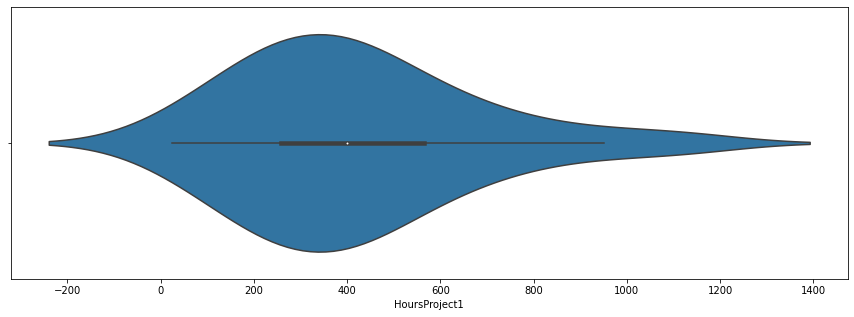

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_projectsv2['HoursProject1'])
plt.show()

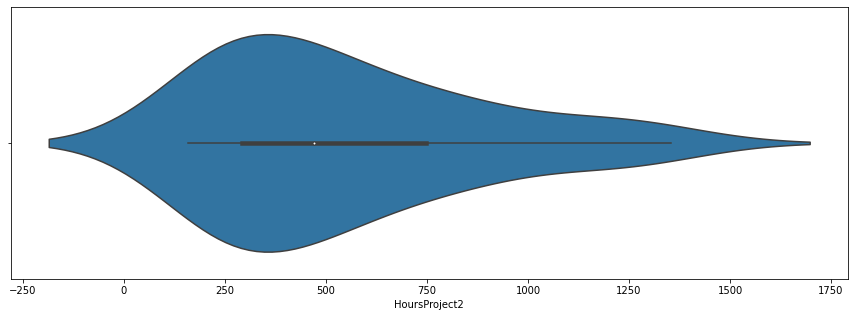

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_projectsv2['HoursProject2'])
plt.show()

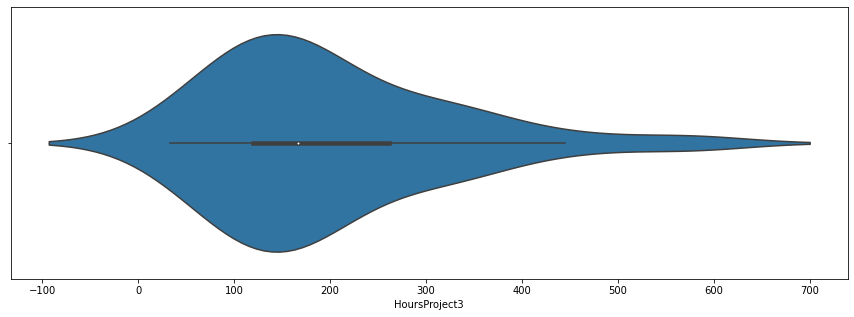

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_projectsv2['HoursProject3'])
plt.show()

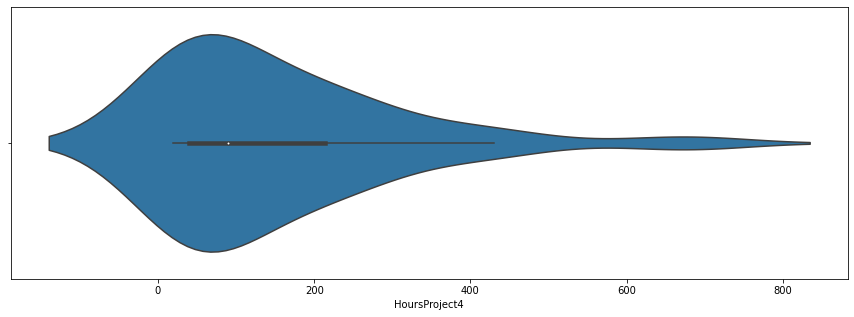

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_projectsv2['HoursProject4'])
plt.show()

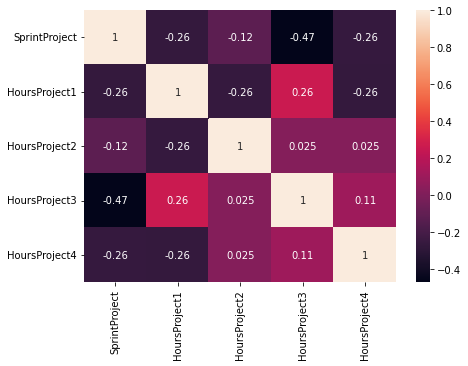

In [ ]:
plt.figure(figsize = (7,5))
corrMatrix = df_projectsv2.corr()
sn.heatmap(corrMatrix, annot=True)

In [ ]:
# create Growth class

# projects
df_projectsv2['Growth'] = 'No'
df_projectsv2.at[0, 'Growth'] = 'Yes'
df_projectsv2.at[1, 'Growth'] = 'No'
df_projectsv2.at[2, 'Growth'] = 'No'
df_projectsv2.at[3, 'Growth'] = 'Yes'
df_projectsv2.at[4, 'Growth'] = 'No'
df_projectsv2.at[5, 'Growth'] = 'Yes'
df_projectsv2.at[6, 'Growth'] = 'No'
df_projectsv2.at[7, 'Growth'] = 'Yes'
df_projectsv2.at[8, 'Growth'] = 'No'
df_projectsv2.at[9, 'Growth'] = 'Yes'
df_projectsv2.at[10, 'Growth'] = 'Yes'
df_projectsv2.at[11, 'Growth'] = 'Yes'
df_projectsv2.at[12, 'Growth'] = 'Yes'
df_projectsv2.at[13, 'Growth'] = 'No'
df_projectsv2.at[14, 'Growth'] = 'No'
df_projectsv2.at[15, 'Growth'] = 'Yes'
df_projectsv2.at[16, 'Growth'] = 'No'
df_projectsv2.at[17, 'Growth'] = 'No'
df_projectsv2.at[18, 'Growth'] = 'Yes'
df_projectsv2.at[19, 'Growth'] = 'No'
df_projectsv2.at[20, 'Growth'] = 'Yes'
df_projectsv2.at[21, 'Growth'] = 'Yes'
df_projectsv2.at[22, 'Growth'] = 'No'
df_projectsv2.at[23, 'Growth'] = 'No'
df_projectsv2.at[24, 'Growth'] = 'Yes'
df_projectsv2.at[25, 'Growth'] = 'Yes'
df_projectsv2.at[26, 'Growth'] = 'Yes'
df_projectsv2.at[27, 'Growth'] = 'Yes'
df_projectsv2.head(5)

,SprintProject,HoursProject1,HoursProject2,HoursProject3,HoursProject4,Growth
0,1,799.50,283.17,573.5,47.5,Yes
1,2,564.50,253.75,320.5,406.5,No
2,3,135.25,193.25,98.0,675.5,No
3,4,473.00,884.75,353.0,242.5,Yes
4,5,385.75,810.40,314.0,210.0,No


In [ ]:
features = list(df_projectsv2.columns[1:5])
print("features:", features, sep="\n")

features:
['HoursProject1', 'HoursProject2', 'HoursProject3', 'HoursProject4']


In [ ]:
targets = df_projectsv2["Growth"]
print("class types:", targets.unique(), sep="\n")

class types:
['Yes' 'No']


In [ ]:
df_projectsv2.dtypes

SprintProject      int64
HoursProject1    float64
HoursProject2    float64
HoursProject3    float64
HoursProject4    float64
Growth            object
dtype: object

**Decision tree classifier aplicado en el dataset de los proyectos.**

In [ ]:
y = df_projectsv2["Growth"]
X = df_projectsv2[features]
dt = DecisionTreeClassifier(min_samples_split=10, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(min_samples_split=10, random_state=99)

[Text(0.4444444444444444, 0.9, 'X[0] <= 392.125\ngini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 48.875\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5, 'X[2] <= 65.625\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'X[0] <= 260.25\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6666666666666666, 0.7, 'X[1] <= 261.25\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 875.625\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 

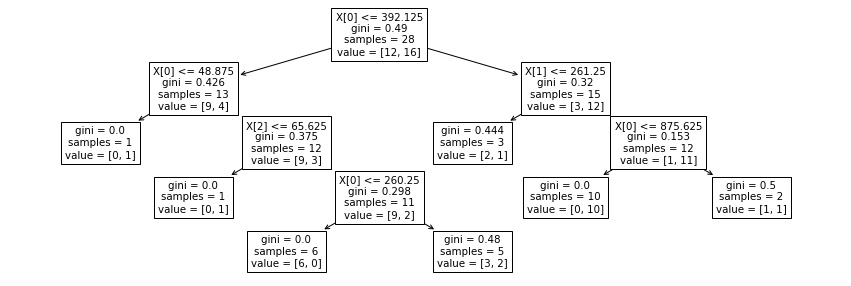

In [ ]:
plt.figure(figsize = (15,5))
tree.plot_tree(dt)

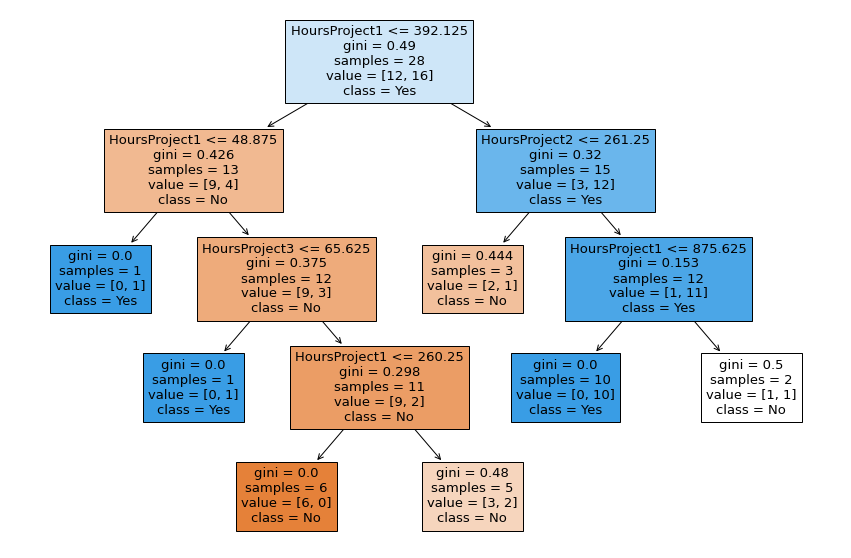

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=['No',"Yes"], filled=True)

In [ ]:
report = export_text(dt, feature_names=features)
print(report)

|--- HoursProject1 <= 392.12
|   |--- HoursProject1 <= 48.88
|   |   |--- class: Yes
|   |--- HoursProject1 >  48.88
|   |   |--- HoursProject3 <= 65.62
|   |   |   |--- class: Yes
|   |   |--- HoursProject3 >  65.62
|   |   |   |--- HoursProject1 <= 260.25
|   |   |   |   |--- class: No
|   |   |   |--- HoursProject1 >  260.25
|   |   |   |   |--- class: No
|--- HoursProject1 >  392.12
|   |--- HoursProject2 <= 261.25
|   |   |--- class: No
|   |--- HoursProject2 >  261.25
|   |   |--- HoursProject1 <= 875.62
|   |   |   |--- class: Yes
|   |   |--- HoursProject1 >  875.62
|   |   |   |--- class: No



In [ ]:
df_train_projects = df_projectsv2

# remove 'SprintProject' and 'Growth' columns
labels = df_train_projects.columns[1:-1]

X = df_train_projects[labels]
y = df_train_projects['Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


**Grid Search aplicado al decision tree classifier en el dataset de los proyectos.**

In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

dt_clf = DecisionTreeClassifier(random_state=3)
dt_param_grid = {'criterion': ['gini'], 'max_depth': [None], 'min_samples_leaf': [3], 'min_samples_split': [2]}

# instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3)

# fit to the data
dt_grid_search.fit(X_train, y_train)

y_pred = dt_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%


In [ ]:
#print(dt_grid_search.best_params_)

Confusion matrix:
 [[4 1]
 [0 2]]


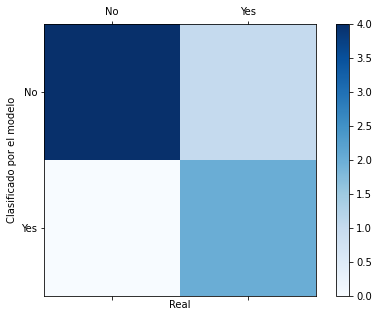

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['No','Yes']
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Real')
plt.ylabel('Clasificado por el modelo')
plt.show()

**XGBoost classifier aplicado en el dataset de los proyectos.**

In [ ]:
df_train_projects = df_projectsv2

# remove 'SprintProject' and 'Growth' columns
labels = df_train_projects.columns[1:-1]

X = df_train_projects[labels]
y = df_train_projects['Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.43%


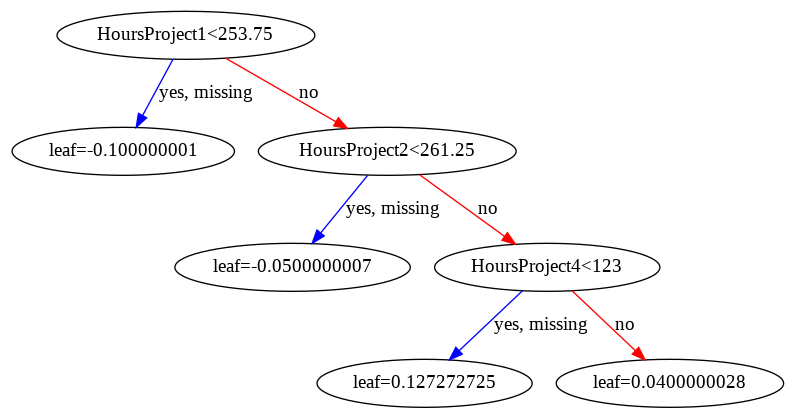

In [ ]:
plt.rcParams["figure.figsize"] = (14,14)
plot_tree(model)
plt.show()

In [ ]:
print("Leftmost leaf value: ", 1/(1+np.exp(-1*0.100000001)))
# 1/(1+2.718281828459045235360**(-1*0.100000001))

Leftmost leaf value:  0.524979187728316


In [ ]:
# dump it to a text file
model.get_booster().dump_model('xgb_model1.txt', with_stats=True)

# read the contents of the file
#with open('xgb_model1.txt', 'r') as f:
#    txt_model = f.read()
#print(txt_model)

**Grid Search aplicado al XGBoost classifier en el dataset de los proyectos.**

In [ ]:
# split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.pipeline import Pipeline

# create a pipeline
pipe = Pipeline([
  ('clf', XGBClassifier(objective='binary:logistic'))
])

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# define our search space for Grid Search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
  }
]

# define Cross Validation
kfold = KFold(n_splits=10)

# accuracy as score
scoring = {'Accuracy':make_scorer(accuracy_score)}

# define Grid Search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='Accuracy',
  verbose=1,
  n_jobs=-1
)

# fit Grid Search
model = grid.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#print(confusion_matrix(y_test, y_pred))

Fitting 10 folds for each of 672 candidates, totalling 6720 fits
Accuracy: 88.89%


Confusion matrix:
 [[3 0]
 [1 5]]


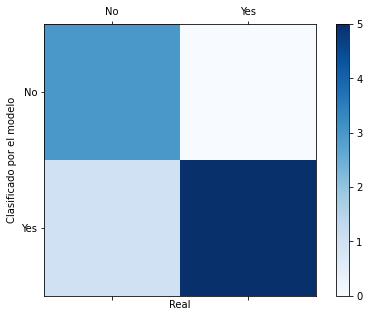

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['No','Yes']
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Real')
plt.ylabel('Clasificado por el modelo')
plt.show()

# **Dataset de usuarios v2.**

In [ ]:
# load SumHoursUsersV2 data into a DataFrame
url = 'https://raw.github.com/GuillermoCervera/TFM-Big-Data-y-Ciencia-de-Datos/main/SumHoursUsersV2.xlsx'
df_usersv2 = pd.read_excel(url)
df_usersv2.head(5)

,SprintUser,HoursUser1,HoursUser2,HoursUser3,HoursUser4,HoursUser5
0,1,171.5,89.25,140.5,175.5,152.0
1,2,177.0,86.00,161.5,170.5,16.0
2,3,102.0,89.50,68.5,96.0,91.0
3,4,187.5,168.00,184.0,160.0,168.0
4,5,167.0,147.25,158.5,170.5,168.0


**EDA aplicado en el dataset de los usuarios.**

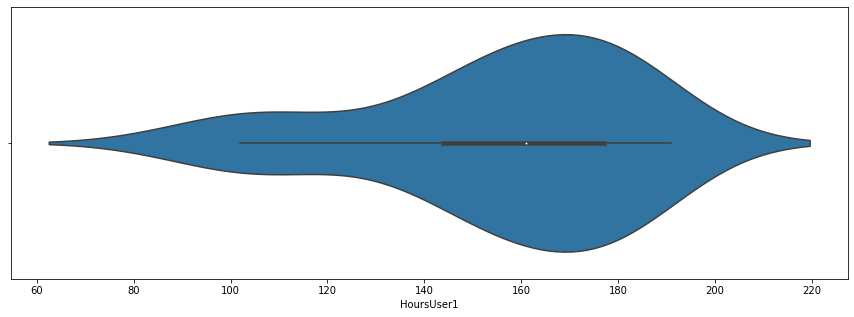

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_usersv2['HoursUser1'])
plt.show()

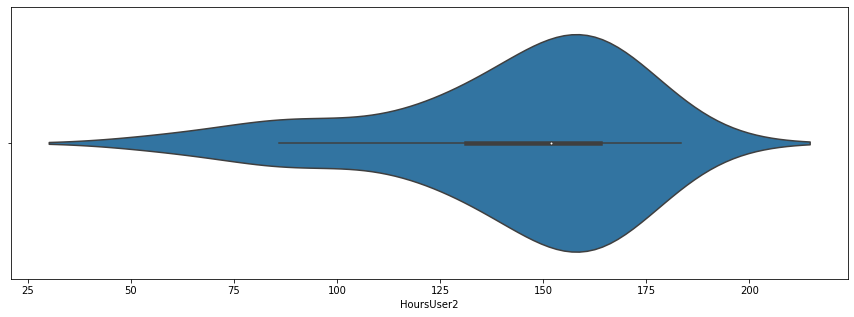

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_usersv2['HoursUser2'])
plt.show()

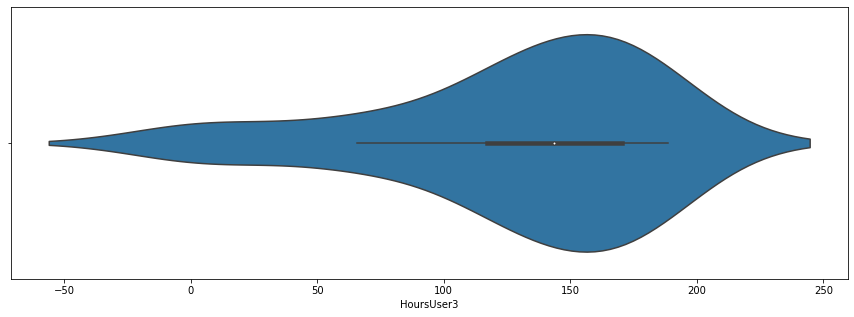

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_usersv2['HoursUser3'])
plt.show()

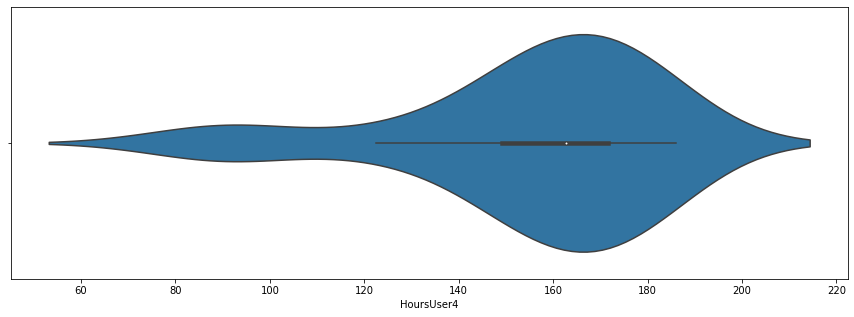

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_usersv2['HoursUser4'])
plt.show()

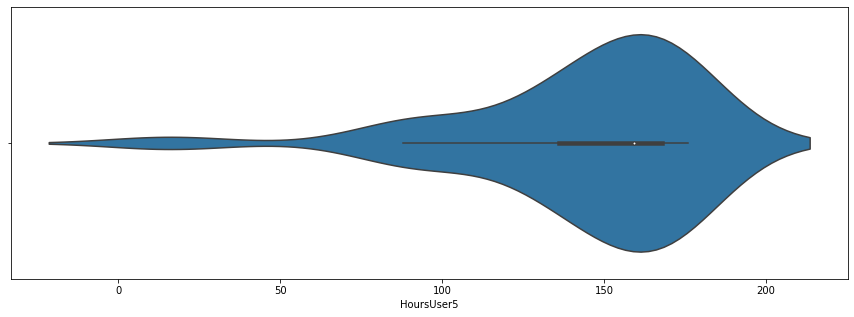

In [ ]:
plt.figure(figsize = (15,5))
ax= sns.violinplot(df_usersv2['HoursUser5'])
plt.show()

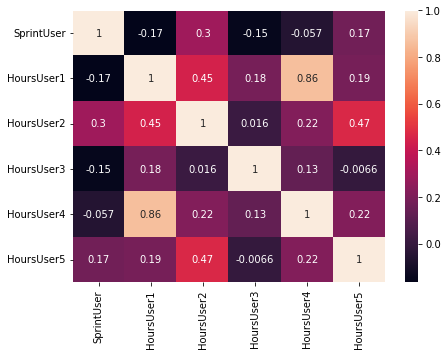

In [ ]:
plt.figure(figsize = (7,5))
corrMatrix = df_usersv2.corr()
sn.heatmap(corrMatrix, annot=True)

In [ ]:
# create Growth class

# users
df_usersv2['Growth'] = 'No'
df_usersv2.at[0, 'Growth'] = 'Yes'
df_usersv2.at[1, 'Growth'] = 'No'
df_usersv2.at[2, 'Growth'] = 'No'
df_usersv2.at[3, 'Growth'] = 'Yes'
df_usersv2.at[4, 'Growth'] = 'No'
df_usersv2.at[5, 'Growth'] = 'Yes'
df_usersv2.at[6, 'Growth'] = 'No'
df_usersv2.at[7, 'Growth'] = 'Yes'
df_usersv2.at[8, 'Growth'] = 'Yes'
df_usersv2.at[9, 'Growth'] = 'No'
df_usersv2.at[10, 'Growth'] = 'No'
df_usersv2.at[11, 'Growth'] = 'Yes'
df_usersv2.at[12, 'Growth'] = 'No'
df_usersv2.at[13, 'Growth'] = 'Yes'
df_usersv2.at[14, 'Growth'] = 'No'
df_usersv2.at[15, 'Growth'] = 'Yes'
df_usersv2.at[16, 'Growth'] = 'No'
df_usersv2.at[17, 'Growth'] = 'No'
df_usersv2.at[18, 'Growth'] = 'Yes'
df_usersv2.at[19, 'Growth'] = 'Yes'
df_usersv2.at[20, 'Growth'] = 'No'
df_usersv2.at[21, 'Growth'] = 'No'
df_usersv2.at[22, 'Growth'] = 'Yes'
df_usersv2.at[23, 'Growth'] = 'Yes'
df_usersv2.at[24, 'Growth'] = 'No'
df_usersv2.at[25, 'Growth'] = 'No'
df_usersv2.at[26, 'Growth'] = 'No'
df_usersv2.at[27, 'Growth'] = 'Yes'
df_usersv2.head(5)

,SprintUser,HoursUser1,HoursUser2,HoursUser3,HoursUser4,HoursUser5,Growth
0,1,171.5,89.25,140.5,175.5,152.0,Yes
1,2,177.0,86.00,161.5,170.5,16.0,No
2,3,102.0,89.50,68.5,96.0,91.0,No
3,4,187.5,168.00,184.0,160.0,168.0,Yes
4,5,167.0,147.25,158.5,170.5,168.0,No


In [ ]:
features = list(df_usersv2.columns[1:5])
print("features:", features, sep="\n")

features:
['HoursUser1', 'HoursUser2', 'HoursUser3', 'HoursUser4']


In [ ]:
targets = df_usersv2["Growth"]
print("class types:", targets.unique(), sep="\n")

class types:
['Yes' 'No']


In [ ]:
df_usersv2.dtypes

SprintUser      int64
HoursUser1    float64
HoursUser2    float64
HoursUser3    float64
HoursUser4    float64
HoursUser5    float64
Growth         object
dtype: object

**Decision tree classifier aplicado en el dataset de los usuarios.**

In [ ]:
y = df_usersv2["Growth"]
X = df_usersv2[features]
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(min_samples_split=5, random_state=99)

[Text(0.375, 0.875, 'X[3] <= 153.5\ngini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.5, 0.625, 'X[1] <= 149.375\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.25, 0.375, 'X[1] <= 131.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.125, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'X[3] <= 157.875\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

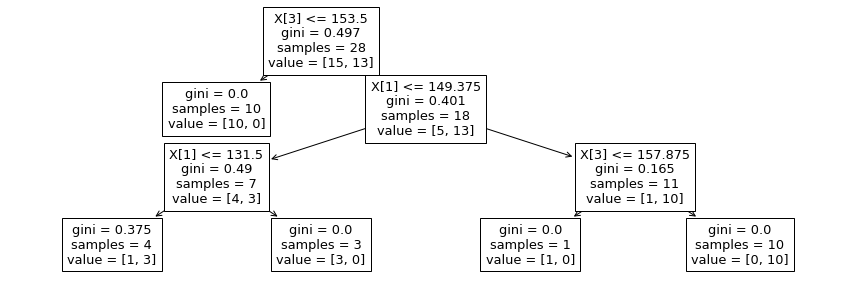

In [ ]:
plt.figure(figsize = (15,5))
tree.plot_tree(dt)

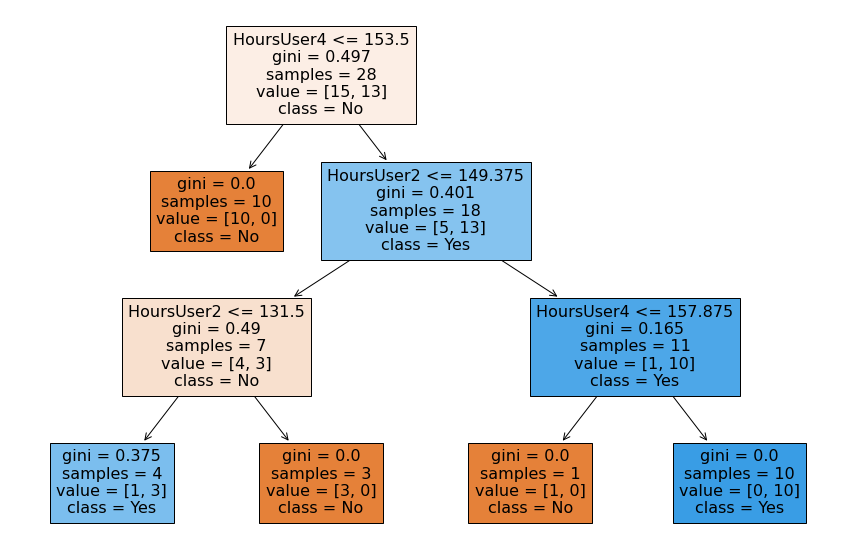

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=['No',"Yes"], filled=True)

In [ ]:
df_train_users = df_usersv2

# remove 'SprintUser' and 'Growth' columns
labels = df_train_users.columns[1:-1]

X = df_train_users[labels]
y = df_train_users['Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

model = DecisionTreeClassifier(min_samples_split=5, random_state=99)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.89%


**GridSearchCV aplicado al decision tree en el dataset de los usuarios.**

In [ ]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=3)
dt_param_grid = {'criterion': ['gini'], 'max_depth': [None], 'min_samples_leaf': [3], 'min_samples_split': [2]}

# instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3)

# fit to the data
dt_grid_search.fit(X_train, y_train)

y_pred = dt_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
print(dt_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}


Confusion matrix:
 [[3 0]
 [0 2]]


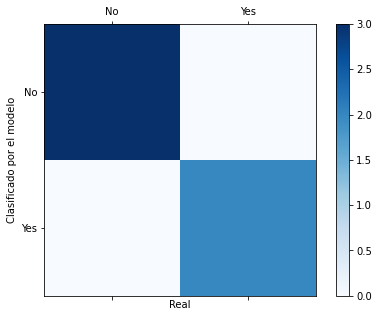

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['No','Yes']
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Real')
plt.ylabel('Clasificado por el modelo')
plt.show()

**XGBoost classifier aplicado en el dataset de los usuarios.**

In [ ]:
df_train_users = df_usersv2

# Remove 'SprintUser' and 'Growth' columns
labels = df_train_users.columns[1:-1]

X = df_train_users[labels]
y = df_train_users['Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


Confusion matrix:
 [[4 0]
 [0 3]]


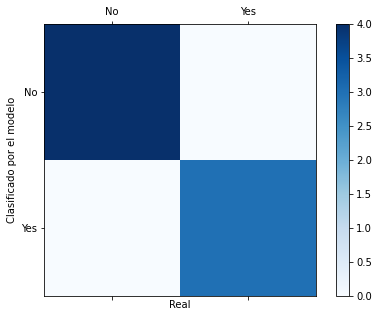

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['No','Yes']
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Real')
plt.ylabel('Clasificado por el modelo')
plt.show()

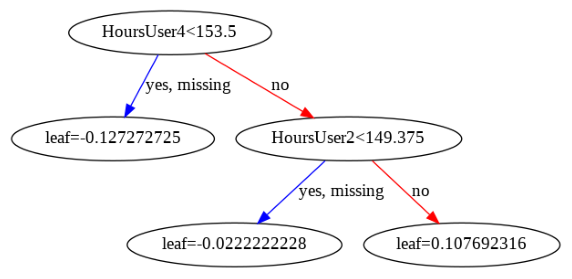

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_tree(model)
plt.show()

In [ ]:
print("Leftmost leaf value: ", 1/(1+np.exp(-1*0.127272725)))
# 1/(1+2.718281828459045235360**(-1*0.127272725))

Leftmost leaf value:  0.5317753005478242


In [ ]:
# dump it to a text file
model.get_booster().dump_model('xgb_model2.txt', with_stats=True)

# read the contents of the file
#with open('xgb_model2.txt', 'r') as f:
#    txt_model = f.read()
#print(txt_model)